In [ ]:
# @title
# !pip install pipreqs

In [ ]:
# @title
from IPython.display import display, HTML
def fancy_header(text):
    display(HTML(f'''<link href="https://fonts.googleapis.com/css2?family=Dancing+Script&display=swap" rel="stylesheet">
    <div style="background-color: #d0f0f0;padding: 20px;border-radius: 12px;text-align: center;font-size: 36px;color: black;
        font-family: 'Dancing Script', cursive;">{text}
    </div>'''))

In [ ]:
# @title
fancy_header("Restaurant Type Prediction w/ NLP")

In [ ]:
# @title
fancy_header("tl;dr")

This project predicts restaurant type from restaurant reviews OR restaurant reviews + other restaurant features using the following models. This was the final performance:

INPUT CODE FOR CHARTS IMAGE

#Intro

In [ ]:
# @title
fancy_header("Introduction")



*  Author: Lindsay McFarlane
*  Date: May 2025
*  Objective: Predict restaurant type from restaurant data using any type of NLP model
* Goal: Accuracy above ~76%, outperforming given baseline model
* Result: 82% accuracy (vs. 76% baseline), an improvement of ~8 %+ over baseline
* Data: 3rd party data (from UCSD NLP Class) on restaurant reviews & other restaurant features
* Models:

    1.   Avg. word embeddings of restaurant reviews (baseline)
    2.   Avg. Word Embeddings (review + features)
    3.   BERT Transformer (on reviews)
    4.   BERT Transformer on reviews + features
    5.   RoBERTA Transformer on reviews & features



>[Intro](#scrollTo=yqDsB4DCYloG)

>>[Import Data](#scrollTo=Rhq9-i6WaWOO)

>>[View Data](#scrollTo=yOWoCaNkYtS-)

>[Data Preparation](#scrollTo=cK4PnORqYp5Y)

>[Average Embedding Models](#scrollTo=h99-Cxve7Bv3)

>>[Data Pre-Processing](#scrollTo=BQrAAU1a1J3b)

>>[Model 1](#scrollTo=ir7d2aDE6Nk0)

>>[Model 2](#scrollTo=sfRa7_EW6Bw6)

>[BERT Transformer Models](#scrollTo=dmyCqwti0l9y)

>>[Model 3](#scrollTo=LRmbbe9-NRXH)

>>[Model 4](#scrollTo=JL5WNzgt2sP8)

>[RoBERTa Transformer Model](#scrollTo=_VUOlEPd0uiM)

>>[Model 5](#scrollTo=qy-UWADF18FP)

>[Model Comparison](#scrollTo=NSljNK9KRc7i)

>[Misc](#scrollTo=oFuYjg7IPH64)



In [ ]:
try:
    import gensim
except ImportError:
    !pip install gensim
    import gensim

📦 This notebook requires `gensim`.  
Run the install cell above first. If Colab asks you to restart the runtime, do that, then re-run the notebook from the top.


##Import Data

In [ ]:
# @title
fancy_header("Import Data")

In [ ]:
!wget "https://raw.githubusercontent.com/lindsayalexandra14/ds_portfolio/refs/heads/main/projects/Restaurant%20Prediction%20NLP/train.csv"
!wget "https://raw.githubusercontent.com/lindsayalexandra14/ds_portfolio/refs/heads/main/projects/Restaurant%20Prediction%20NLP/test.csv"


--2025-07-19 20:13:57--  https://raw.githubusercontent.com/lindsayalexandra14/ds_portfolio/refs/heads/main/projects/Restaurant%20Prediction%20NLP/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58726271 (56M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  56.00M   244MB/s    in 0.2s    

2025-07-19 20:13:58 (244 MB/s) - ‘train.csv’ saved [58726271/58726271]

--2025-07-19 20:13:58--  https://raw.githubusercontent.com/lindsayalexandra14/ds_portfolio/refs/heads/main/projects/Restaurant%20Prediction%20NLP/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.13

In [ ]:
import pandas as pd
import numpy as np

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

##View Data

In [ ]:
# @title
fancy_header("View Data")

View shape of data:

*   13k rows and 62 features for training data
*   10k rows and 61 features for test data (same features but does not have 'label' > one fewer feature)



In [ ]:
print(df_train.shape)
print(df_test.shape)

(13144, 62)
(10000, 61)


*Note: The given "test set" is unlabeled so won't be used here and was only used for Kaggle scoring in the platform*

View names of all features/columns:

In [ ]:
print(df_train. columns)

Index(['id', 'attributes.HappyHour', 'attributes.Ambience', 'hours.Tuesday',
       'postal_code', 'attributes.AgesAllowed', 'attributes.GoodForDancing',
       'attributes.OutdoorSeating', 'hours.Saturday', 'attributes.Corkage',
       'longitude', 'name', 'attributes.BusinessAcceptsCreditCards',
       'attributes.RestaurantsTableService',
       'attributes.RestaurantsReservations', 'hours.Friday',
       'attributes.RestaurantsPriceRange2', 'attributes.WiFi',
       'attributes.ByAppointmentOnly', 'attributes.Music',
       'attributes.NoiseLevel', 'attributes.BYOB', 'state',
       'attributes.Alcohol', 'attributes.HasTV', 'attributes',
       'attributes.BYOBCorkage', 'hours.Wednesday', 'hours.Sunday',
       'attributes.RestaurantsGoodForGroups', 'attributes.Open24Hours',
       'attributes.BusinessParking', 'attributes.DogsAllowed',
       'attributes.HairSpecializesIn', 'review_count', 'is_open',
       'attributes.Caters', 'attributes.CoatCheck', 'attributes.BikeParking',
   

#Data Preparation

In [ ]:
# @title
fancy_header("Data Preparation")

In [ ]:
# @title
fancy_header("Missing Values")

Create dataframe of features with their count and % of missing values (if above 0 -> they had missing values):

In [ ]:
missing_df = pd.DataFrame({
    'Missing Count': df_train.isnull().sum(),
    'Missing %': (df_train.isnull().sum() / len(df_train)) * 100
})
missing_df[missing_df['Missing Count'] > 0].sort_values('Missing %', ascending=False)

,Missing Count,Missing %
attributes.HairSpecializesIn,13144,100.000000
attributes.Open24Hours,13143,99.992392
attributes.DietaryRestrictions,13143,99.992392
attributes.AcceptsInsurance,13142,99.984784
attributes.RestaurantsCounterService,13141,99.977176
attributes.BYOB,13139,99.961960
attributes.AgesAllowed,13132,99.908704
attributes.ByAppointmentOnly,13031,99.140292
attributes.Corkage,12962,98.615338
attributes.BYOBCorkage,12701,96.629641


 Drop columns with more than 70% missing:

In [ ]:
# Threshold to keep columns with at least 30% non-null values
threshold = 0.30

original_cols = df_train.columns

valid_cols = df_train.columns[df_train.isnull().mean() < (1 - threshold)]

# Except keep the bitcoin feature despite its missingness %
if "attributes.BusinessAcceptsBitcoin" in df_train.columns and \
   "attributes.BusinessAcceptsBitcoin" not in valid_cols:
    valid_cols = valid_cols.append(pd.Index(["attributes.BusinessAcceptsBitcoin"]))

# Drop columns in original_cols but NOT in valid_cols
dropped_cols = original_cols.difference(valid_cols)

print(f"Columns dropped ({len(dropped_cols)}):")
print(dropped_cols.tolist())

# Set dataframes to only include valid columns for training and test
df_train = df_train[valid_cols]
df_test = df_test[valid_cols.intersection(df_test.columns)]


Columns dropped (19):
['attributes.AcceptsInsurance', 'attributes.AgesAllowed', 'attributes.BYOB', 'attributes.BYOBCorkage', 'attributes.BestNights', 'attributes.ByAppointmentOnly', 'attributes.CoatCheck', 'attributes.Corkage', 'attributes.DietaryRestrictions', 'attributes.DogsAllowed', 'attributes.DriveThru', 'attributes.GoodForDancing', 'attributes.HairSpecializesIn', 'attributes.HappyHour', 'attributes.Music', 'attributes.Open24Hours', 'attributes.RestaurantsCounterService', 'attributes.Smoking', 'attributes.WheelchairAccessible']


View updated data shape and features:

In [ ]:
print(df_train.shape)
print(df_test.shape)
print(df_train.columns)
print(df_test.columns)

(13144, 43)
(10000, 42)
Index(['id', 'attributes.Ambience', 'hours.Tuesday', 'postal_code',
       'attributes.OutdoorSeating', 'hours.Saturday', 'longitude', 'name',
       'attributes.BusinessAcceptsCreditCards',
       'attributes.RestaurantsTableService',
       'attributes.RestaurantsReservations', 'hours.Friday',
       'attributes.RestaurantsPriceRange2', 'attributes.WiFi',
       'attributes.NoiseLevel', 'state', 'attributes.Alcohol',
       'attributes.HasTV', 'attributes', 'hours.Wednesday', 'hours.Sunday',
       'attributes.RestaurantsGoodForGroups', 'attributes.BusinessParking',
       'review_count', 'is_open', 'attributes.Caters',
       'attributes.BikeParking', 'hours.Monday', 'city', 'stars',
       'attributes.RestaurantsTakeOut', 'latitude', 'business_id',
       'hours.Thursday', 'attributes.RestaurantsAttire',
       'attributes.RestaurantsDelivery', 'address', 'attributes.GoodForKids',
       'attributes.GoodForMeal', 'hours', 'label', 'review',
       'attribute

In [ ]:
# @title
fancy_header("Removing Characters")

View state of formatting:

In [ ]:
print(df_train.head())

   id                                attributes.Ambience hours.Tuesday  \
0   0  b"{'romantic': False, 'intimate': False, 'clas...   b'15:0-2:0'   
1   1  b"{'romantic': False, 'intimate': False, 'tour...  b'11:0-21:0'   
2   2                                                NaN  b'11:0-21:0'   
3   3  b"{'romantic': False, 'intimate': False, 'clas...           NaN   
4   4  b"{'romantic': False, 'intimate': False, 'tour...           NaN   

  postal_code attributes.OutdoorSeating hours.Saturday   longitude  \
0    b'44107'                  b'False'   b'11:30-2:0'  -81.820568   
1    b'85042'                   b'True'  b'11:0-20:30' -112.032893   
2  b'M4M 3G6'                       NaN   b'11:0-21:0'  -79.339163   
3    b'89146'                  b'False'            NaN -115.242714   
4    b'44133'                  b'False'            NaN  -81.726357   

                      name attributes.BusinessAcceptsCreditCards  \
0              b'Rush Inn'                               b'True'  

Fix string formatting, first combining the training and test to apply formatting to both datasets at once. Then remove byte-string (b'), unicode-string (u'), and quote characters from the data:

In [ ]:
df_train["source"] = "train"
df_test["source"] = "test"
combined = pd.concat([df_train, df_test], axis=0)

combined = combined.apply(lambda col: col.astype(str).str.replace(r"^b'|^b\"|\"|'|u'", '', regex=True))

/tmp/ipython-input-20-1302242197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["source"] = "train"
/tmp/ipython-input-20-1302242197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["source"] = "test"


Split data back into training and test sets:

In [ ]:
df_train = combined[combined["source"] == "train"].drop("source", axis=1)
df_test = combined[combined["source"] == "test"].drop("source", axis=1)

View data to check that characters were removed and formatting looks usable:

In [ ]:
print(df_train.head())

  id                                attributes.Ambience hours.Tuesday  \
0  0  {romantic: False, intimate: False, classy: Fal...      15:0-2:0   
1  1  {romantic: False, intimate: False, touristy: F...     11:0-21:0   
2  2                                                nan     11:0-21:0   
3  3  {romantic: False, intimate: False, classy: Fal...           nan   
4  4  {romantic: False, intimate: False, touristy: F...           nan   

  postal_code attributes.OutdoorSeating hours.Saturday     longitude  \
0       44107                     False      11:30-2:0  -81.82056826   
1       85042                      True     11:0-20:30  -112.0328928   
2     M4M 3G6                       nan      11:0-21:0   -79.3391627   
3       89146                     False            nan   -115.242714   
4       44133                     False            nan   -81.7263567   

                   name attributes.BusinessAcceptsCreditCards  \
0              Rush Inn                                  True  

Note, the combining and separating the train and test sets above gave a 'label' column to the test set, just with na's. Won't be pulled in later, but good to know:

In [ ]:
print(df_test['label'])

0       nan
1       nan
2       nan
3       nan
4       nan
       ... 
9995    nan
9996    nan
9997    nan
9998    nan
9999    nan
Name: label, Length: 10000, dtype: object


In [ ]:
# @title
fancy_header("Handle Null Values")

Make 'None's in a consistent format:
Replace actual NaNs with the string 'None'.
Normalize anything that *means* 'None' (case-insensitive):

In [ ]:
df_train = df_train.fillna('None')
df_train = df_train.applymap(lambda x: 'None' if str(x).strip().lower() in ['none', 'nan', 'b\'none\'', 'b"none"'] else x)


/tmp/ipython-input-25-4231328681.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train = df_train.applymap(lambda x: 'None' if str(x).strip().lower() in ['none', 'nan', 'b\'none\'', 'b"none"'] else x)


Apply same formatting to the test data:

In [ ]:
df_test = df_test.fillna('None')

df_test = df_test.applymap(lambda x: 'None' if str(x).strip().lower() in ['none', 'nan', 'b\'none\'', 'b"none"'] else x)

/tmp/ipython-input-26-3076401178.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_test = df_test.applymap(lambda x: 'None' if str(x).strip().lower() in ['none', 'nan', 'b\'none\'', 'b"none"'] else x)


#Initial Dimension Reduction

In [ ]:
fancy_header("Initial Dimension Reduction")

Drop features:

*   id, business_id - not informative
*   latitude, longitude, address, postal code, city, hours - too granular to use
*   is_open, review count - not indicative of type
*  parking (bike, business) - not indicative of type, one field is too complex for low value, mostly dependent on the city/location
*   attributes is a field of all the attributes combined - don't want all


Drop columns that will definitely not be used:

In [ ]:
columns_to_drop = ['id','business_id','latitude','longitude','hours','address', 'postal_code','city',
                   'hours.Monday','hours.Tuesday','hours.Wednesday','hours.Thursday',
                   'hours.Friday','hours.Saturday', 'hours.Sunday',
                   'attributes.BusinessParking','attributes.BikeParking',
                   'is_open','review_count','attributes']
df_train = df_train.drop(columns_to_drop, axis=1)
df_test= df_test.drop(columns_to_drop, axis=1)

In [ ]:
print(df_train.columns)

Index(['attributes.Ambience', 'attributes.OutdoorSeating', 'name',
       'attributes.BusinessAcceptsCreditCards',
       'attributes.RestaurantsTableService',
       'attributes.RestaurantsReservations',
       'attributes.RestaurantsPriceRange2', 'attributes.WiFi',
       'attributes.NoiseLevel', 'state', 'attributes.Alcohol',
       'attributes.HasTV', 'attributes.RestaurantsGoodForGroups',
       'attributes.Caters', 'stars', 'attributes.RestaurantsTakeOut',
       'attributes.RestaurantsAttire', 'attributes.RestaurantsDelivery',
       'attributes.GoodForKids', 'attributes.GoodForMeal', 'label', 'review',
       'attributes.BusinessAcceptsBitcoin'],
      dtype='object')


In [ ]:
# @title
fancy_header("Feature Engineering")

The feature engineering that I performed is largely to provide as much concise, text-rich info as possible phrased in a Natural Language way that BERT would interpret better than for example: "AZ" (for a state) or "PriceRange: 2" which were their original form.

Note, first relabeling the review field to "text" as it's more intuitive and standard as an input feature name for the NLP tokenizing functions. Then the "review" field is included as a field to drop:

In [ ]:
df_train["text"] = df_train["review"]
df_test["text"] = df_test["review"]

I viewed the unique states in the 'state' column in order to build a state map to assign their exact state names to the values so that it has more specific/useful text information to feed the natural language processing model.

This is important, for example, to identify the Candadian states (e.g., for 'Quebec Canada' the word 'Canada' can be picked up in the model and help predict the 'Canadian restaurant' type).

There are other ways to group the data and assign regions to it but there were not that many states so I did not group them. Adding the full state names in the model though should provide clearer info for the word embeddings, in addition to adding the Canadian tag:

In [ ]:
print(df_train["state"].unique())

['OH' 'AZ' 'ON' 'NV' 'SC' 'WI' 'QC' 'PA' 'NC' 'AB' 'IL' 'VA']


In [ ]:
state_map = {
    "QC": "Quebec Canada",
    "ON": "Ontario Canada",
    "BC": "British Columbia Canada",
    "AZ": "Arizona",
    "OH": "Ohio",
    "NV": "Nevada",
    "SC": "South Carolina",
    "WI": "Wisconsin",
    "PA": "Philadelphia",
    "NC": "North Carolina",
    "IL": "Illinois",
    "VA": "Virginia",
    "AB": "Alberta Canada"
}

df_train["state"] = df_train["state"].map(state_map).fillna(df_train["state"])
df_test["state"] = df_test["state"].map(state_map).fillna(df_test["state"])


Confirm mapping and show new 'state' values:

In [ ]:
print(df_train["state"].unique())

['Ohio' 'Arizona' 'Ontario Canada' 'Nevada' 'South Carolina' 'Wisconsin'
 'Quebec Canada' 'Philadelphia' 'North Carolina' 'Alberta Canada'
 'Illinois' 'Virginia']


Inspect 'attribute' columns and their unique values because they have the same complex structure. Some were True/False/None but some were dictionaries. They will need to be reformatted:

In [ ]:
for col in df_train.columns:
    if col.startswith("attributes."):
        print(f"\nColumn: {col}")
        print(df_train[col].dropna().astype(str).unique().tolist())


Column: attributes.Ambience
['{romantic: False, intimate: False, classy: False, hipster: False, divey: False, touristy: False, trendy: False, upscale: False, casual: True}', '{romantic: False, intimate: False, touristy: False, hipster: False, divey: False, classy: False, trendy: False, upscale: False, casual: True}', 'None', '{romantic: False, intimate: False, classy: False, hipster: False, divey: False, touristy: False, trendy: False, upscale: False, casual: False}', '{romantic: False, intimate: False, touristy: False, hipster: False, divey: False, classy: False, trendy: False, upscale: False, casual: False}', '{touristy: False, hipster: False, romantic: False, divey: False, intimate: False, trendy: False, upscale: False, classy: False, casual: True}', '{touristy: False, hipster: False, romantic: False, intimate: False, trendy: True, upscale: False, classy: True, casual: True}', '{romantic: False, intimate: False, touristy: False, hipster: False, divey: False, classy: True, trendy: F

In [ ]:
print(df_train.head())

                                 attributes.Ambience  \
0  {romantic: False, intimate: False, classy: Fal...   
1  {romantic: False, intimate: False, touristy: F...   
2                                               None   
3  {romantic: False, intimate: False, classy: Fal...   
4  {romantic: False, intimate: False, touristy: F...   

  attributes.OutdoorSeating                  name  \
0                     False              Rush Inn   
1                      True              GreenMix   
2                      None  BarBurrito - Gerrard   
3                     False              SalvaMex   
4                     False              Hop Hing   

  attributes.BusinessAcceptsCreditCards attributes.RestaurantsTableService  \
0                                  True                               None   
1                                  True                               None   
2                                  None                               None   
3                               

I viewed the 'Attire' values and wanted to maintain the word "attire" for the model to read and only keep the values that have valuable text info so I reformatted and removed the 'None' values:

In [ ]:
print(df_train["attributes.RestaurantsAttire"].unique())

['casual' 'None' 'dressy' 'formal']


In [ ]:
def map_attire(value):
    if value == "casual":
        return "Casual attire"
    elif value == "dressy":
        return "Dressy attire"
    elif value == "formal":
        return "Formal attire"
    else:
        return ""  # For None or anything else

df_train["attributes.RestaurantsAttire"] = df_train["attributes.RestaurantsAttire"].apply(map_attire)
df_test["attributes.RestaurantsAttire"] = df_test["attributes.RestaurantsAttire"].apply(map_attire)


This "no false" version (not also adding "Not Kid-Friendly") performed better for these types of features where there was a True False, implying the negative versions are likely adding noise so my strategy was to only keep the positive values and make them as concise and word embedding friendly as possible. This way it was more likely to produce a cleaner signal for the words

Similarly I adjusted the "Good for Kids" field to "Kid-friendly so that the text information is again in the values instead of just saying True False and also so it is concise enough to be well-interpreted by the word embeddings in the model:

In [ ]:
def map_wifi(value):
    if value == "free":
        return "Free WiFi"
        #['no', 'None', 'free', 'paid']
    elif value == "paid":
        return "Paid WiFi"
    else:
        return ""  # For None or anything else

df_train["attributes.WiFi"] = df_train["attributes.WiFi"].apply(map_wifi)
df_test["attributes.WiFi"] = df_test["attributes.WiFi"].apply(map_wifi)


In [ ]:
def map_noise(value):
    if value == "loud":
        return "Noisy"
    elif value == "quiet":
        return "Quiet"
    elif value == "average":
        return "Average noise"
    elif value == "very_loud":
        return "Very noisy"
    else:
        return ""  # For None or anything else
        #['loud', 'quiet', 'None', 'average', 'very_loud']

df_train["attributes.NoiseLevel"] = df_train["attributes.NoiseLevel"].apply(map_noise)
df_test["attributes.NoiseLevel"] = df_test["attributes.NoiseLevel"].apply(map_noise)


In [ ]:
def map_good_for_kids(value):
    if value is True or value == "True":
        return "Kid-friendly"
    elif value is False or value == "False":
        return "False"
    else:
        return ""  # For None or anything else

df_train["attributes.GoodForKids"] = df_train["attributes.GoodForKids"].apply(map_good_for_kids)
df_test["attributes.GoodForKids"] = df_test["attributes.GoodForKids"].apply(map_good_for_kids)


In [ ]:
print(df_train["attributes.GoodForKids"].head())

0           False
1    Kid-friendly
2                
3    Kid-friendly
4    Kid-friendly
Name: attributes.GoodForKids, dtype: object


I performed the same formatting adjustment on the fields below so that they also include as much text information as possible to feed the natural language model.

In [ ]:
def map_delivery(value):
    if value is True or value == "True":
        return "Delivery"
    elif value is False or value == "False":
        return "False"
    else:
        return ""  # For None or anything else

df_train["attributes.RestaurantsDelivery"] = df_train["attributes.RestaurantsDelivery"].apply(map_delivery)
df_test["attributes.RestaurantsDelivery"] = df_test["attributes.RestaurantsDelivery"].apply(map_delivery)


 For 'Price' I gave them low, medium, high, very high price for the same reason:

In [ ]:
print(df_train["attributes.RestaurantsPriceRange2"].unique())

['2' 'None' '1' '3' '4']


In [ ]:
def map_pricerange(value):
    if value =='1':
        return "Low Price"
    elif value =='2':
        return "Moderate Price"
    elif value =='3':
        return "High Price"
    elif value =='4':
        return "Very High Price"
    else:
        return ""  # For None or anything else

df_train["attributes.RestaurantsPriceRange2"] = df_train["attributes.RestaurantsPriceRange2"].apply(map_pricerange)
df_test["attributes.RestaurantsPriceRange2"] = df_test["attributes.RestaurantsPriceRange2"].apply(map_pricerange)


In [ ]:
print(df_train['attributes.RestaurantsPriceRange2'].head())

0    Moderate Price
1    Moderate Price
2                  
3         Low Price
4         Low Price
Name: attributes.RestaurantsPriceRange2, dtype: object


In [ ]:
def map_cc(value):
    if value is True or value == "True":
        return "Accepts Credit Cards"
    elif value is False or value == "False":
        return "False"
    else:
        return ""  # For None or anything else

df_train["attributes.BusinessAcceptsCreditCards"] = df_train["attributes.BusinessAcceptsCreditCards"].apply(map_cc)
df_test["attributes.BusinessAcceptsCreditCards"] = df_test["attributes.BusinessAcceptsCreditCards"].apply(map_cc)


In [ ]:
def map_bitcoin(value):
    if value is True or value == "True":
        return "Accepts Bitcoin"
    elif value is False or value == "False":
        return "False"
    else:
        return ""  # For None or anything else

df_train["attributes.BusinessAcceptsBitcoin"] = df_train["attributes.BusinessAcceptsBitcoin"].apply(map_bitcoin)
df_test["attributes.BusinessAcceptsBitcoin"] = df_test["attributes.BusinessAcceptsBitcoin"].apply(map_bitcoin)


In [ ]:
def map_outdoor_seating(value):
    if value is True or value == "True":
        return "Outdoor Seating"
    elif value is False or value == "False":
        return "False"
    else:
        return ""  # For None or anything else

df_train["attributes.OutdoorSeating"] = df_train["attributes.OutdoorSeating"].apply(map_outdoor_seating)
df_test["attributes.OutdoorSeating"] = df_test["attributes.OutdoorSeating"].apply(map_outdoor_seating)


In [ ]:
def map_tv(value):
    if value is True or value == "True":
        return "Has TV"
    elif value is False or value == "False":
        return "False"
    else:
        return ""  # For None or anything else

df_train["attributes.HasTV"] = df_train["attributes.HasTV"].apply(map_tv)
df_test["attributes.HasTV"] = df_test["attributes.HasTV"].apply(map_tv)


In [ ]:
def map_groups(value):
    if value is True or value == "True":
        return "Good for Groups"
    elif value is False or value == "False":
        return "False"
    else:
        return ""  # For None or anything else

df_train["attributes.RestaurantsGoodForGroups"] = df_train["attributes.RestaurantsGoodForGroups"].apply(map_groups)
df_test["attributes.RestaurantsGoodForGroups"] = df_test["attributes.RestaurantsGoodForGroups"].apply(map_groups)


In [ ]:
def map_tableservice(value):
    if value is True or value == "True":
        return "Table Service"
    elif value is False or value == "False":
        return "False"
    else:
        return ""  # For None or anything else

df_train["attributes.RestaurantsTableService"] = df_train["attributes.RestaurantsTableService"].apply(map_tableservice)
df_test["attributes.RestaurantsTableService"] = df_test["attributes.RestaurantsTableService"].apply(map_tableservice)


In [ ]:
def map_reservations(value):
    if value is True or value == "True":
        return "Takes reservations"
    elif value is False or value == "False":
        return "False"
    else:
        return ""  # For None or anything else

df_train["attributes.RestaurantsReservations"] = df_train["attributes.RestaurantsReservations"].apply(map_reservations)
df_test["attributes.RestaurantsReservations"] = df_test["attributes.RestaurantsReservations"].apply(map_reservations)


In [ ]:
def map_takeout(value):
    if value is True or value == "True":
        return "Takeout"
    elif value is False or value == "False":
        return "False"
    else:
        return ""  # For None or anything else

df_train["attributes.RestaurantsTakeOut"] = df_train["attributes.RestaurantsTakeOut"].apply(map_takeout)
df_test["attributes.RestaurantsTakeOut"] = df_test["attributes.RestaurantsTakeOut"].apply(map_takeout)


In [ ]:
def map_caters(value):
    if value is True or value == "True":
        return "Caters"
    elif value is False or value == "False":
        return "False"
    else:
        return ""  # For None or anything else

df_train["attributes.Caters"] = df_train["attributes.Caters"].apply(map_caters)
df_test["attributes.Caters"] = df_test["attributes.Caters"].apply(map_caters)


In [ ]:
def map_alcohol(value):
    if value == "beer_and_wine":
        return "Beer and Wine"
    elif value == "full_bar":
        return "Full bar"
    else:
        return ""  # For None or anything else

df_train["attributes.Alcohol"] = df_train["attributes.Alcohol"].apply(map_alcohol)
df_test["attributes.Alcohol"] = df_test["attributes.Alcohol"].apply(map_alcohol)


In [ ]:
type(df_train["attributes.GoodForMeal"].iloc[0])


str

'Good for Meal' and 'Ambience' had the string dictionary-type structure that needed major reformatting to parse out Ambience: casual: True, romantic: False for example to just 'casual'. Or 'Good for Dinner vs. 'Breakfast: False, Dinner: True, etc. This removes unnecessary words where things are False since the model can only take in so many words.


In [ ]:
import re
import json

# Step 1: Convert the string into a usable dictionary
def parse_good_for_meal(row):
    if not isinstance(row, str) or row.strip() == "":
        return {}
    try:
        # Add quotes around keys and convert True/False to JSON compatible format
        fixed = re.sub(r'(\w+):', r'"\1":', row)  # keys
        fixed = fixed.replace("True", "true").replace("False", "false")  # booleans
        return json.loads(fixed)
    except Exception as e:
        # print(f"Failed to parse: {row}")
        return {}

# Step 2: Create readable label from True values
def label_good_meals(meal_dict):
    return ', '.join([f"Good for {k}" for k, v in meal_dict.items() if v is True])

# Step 3: Apply both steps
df_train["GoodForMeal_dict"] = df_train["attributes.GoodForMeal"].apply(parse_good_for_meal)
df_train["attributes.GoodForMeal"] = df_train["GoodForMeal_dict"].apply(label_good_meals)

df_test["GoodForMeal_dict"] = df_test["attributes.GoodForMeal"].apply(parse_good_for_meal)
df_test["attributes.GoodForMeal"] = df_test["GoodForMeal_dict"].apply(label_good_meals)



In [ ]:
import re
import json

# Step 1: Convert the string into a usable dictionary
def parse_ambience(row):
    if not isinstance(row, str) or row.strip() == "":
        return {}
    try:
        # Add quotes around keys and convert True/False to JSON compatible format
        fixed = re.sub(r'(\w+):', r'"\1":', row)  # keys
        fixed = fixed.replace("True", "true").replace("False", "false")  # booleans
        return json.loads(fixed)
    except Exception as e:
        # print(f"Failed to parse: {row}")
        return {}

# Step 2: Create readable label from True values
def label_ambience(ambience_dict):
    return ', '.join([f"{k}" for k, v in ambience_dict.items() if v is True])

# Step 3: Apply both steps
df_train["Ambience_dict"] = df_train["attributes.Ambience"].apply(parse_ambience)
df_train["attributes.Ambience"] = df_train["Ambience_dict"].apply(label_ambience)

df_test["Ambience_dict"] = df_test["attributes.Ambience"].apply(parse_ambience)
df_test["attributes.Ambience"] = df_test["Ambience_dict"].apply(label_ambience)


In [ ]:
df_train.drop(["GoodForMeal_dict", "Ambience_dict"], axis=1, inplace=True)
df_test.drop(["GoodForMeal_dict", "Ambience_dict"], axis=1, inplace=True)

Check examples for Good For Meal and Ambience. They have many unique values, so checking them this way vs. the ones with few unique values below it:

In [ ]:
print(df_train["attributes.GoodForMeal"].head(1))

0    Good for lunch, Good for dinner
Name: attributes.GoodForMeal, dtype: object


In [ ]:
print(df_train["attributes.Ambience"].head(1))

0    casual
Name: attributes.Ambience, dtype: object


Check new unique values for attribute features:

In [ ]:
for col in df_train.columns:
    if col.startswith("attributes.") and col not in ["attributes.GoodForMeal", "attributes.Ambience"]:
        print(f"\nColumn: {col}")
        print(df_train[col].dropna().astype(str).unique().tolist())



Column: attributes.OutdoorSeating
['False', 'Outdoor Seating', '']

Column: attributes.BusinessAcceptsCreditCards
['Accepts Credit Cards', '', 'False']

Column: attributes.RestaurantsTableService
['', 'Table Service', 'False']

Column: attributes.RestaurantsReservations
['False', 'Takes reservations', '']

Column: attributes.RestaurantsPriceRange2
['Moderate Price', '', 'Low Price', 'High Price', 'Very High Price']

Column: attributes.WiFi
['', 'Free WiFi', 'Paid WiFi']

Column: attributes.NoiseLevel
['Noisy', 'Quiet', '', 'Average noise', 'Very noisy']

Column: attributes.Alcohol
['Full bar', '', 'Beer and Wine']

Column: attributes.HasTV
['Has TV', 'False', '']

Column: attributes.RestaurantsGoodForGroups
['Good for Groups', '', 'False']

Column: attributes.Caters
['Caters', '', 'False']

Column: attributes.RestaurantsTakeOut
['Takeout', 'False', '']

Column: attributes.RestaurantsAttire
['Casual attire', '', 'Dressy attire', 'Formal attire']

Column: attributes.RestaurantsDelivery


Although some restaurant-specific features were too specific or not useful to input into the model, the 'name' I hypothesized would be very important. The words in a restaurant name whether they are French (to indicate Canadian) or include something related to the restaurant type ('Tacos') really help add information to the model.

In [ ]:
print(df_train['name'].head(10))

0                     Rush Inn
1                     GreenMix
2         BarBurrito - Gerrard
3                     SalvaMex
4                     Hop Hing
5         Caramba Mexican Food
6                    Taco Bell
7                     Red Bowl
8    Beiruti Grand Caf\xc3\xa9
9        T&T - Tacos & Tequila
Name: name, dtype: object


#EDA

In [ ]:
# @title
fancy_header("EDA")

In [ ]:
# @title
fancy_header("Bar Plots")

TRY CUSTOM COLOR PALETTE PER CHAT

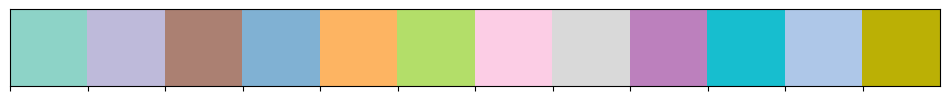

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color palette
custom_palette = [
    '#8dd3c7',
    '#bebada',
    '#ab8072',
    '#80b1d3',
    '#fdb462',
    '#b3de69',
    '#fccde5',
    '#d9d9d9',
    '#bc80bd',
    '#17becf',
    '#aec7e8',
    '#bbb005']

sns.palplot(custom_palette)
plt.show()

Function for creating bar plots of Features (Restaurant Features) vs. Labels (Restaurant Type):

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

label_col = 'label'
feature_cols = [
    'attributes.OutdoorSeating',
    'attributes.BusinessAcceptsCreditCards',
    'attributes.RestaurantsTableService',
    'attributes.RestaurantsReservations',
    'attributes.RestaurantsPriceRange2',
    'attributes.WiFi',
    'attributes.NoiseLevel',
    'state',
    'attributes.Alcohol',
    'attributes.HasTV',
    'attributes.RestaurantsGoodForGroups',
    'attributes.Caters',
    'attributes.RestaurantsTakeOut',
    'attributes.RestaurantsAttire',
    'attributes.RestaurantsDelivery',
    'attributes.GoodForKids',
    'attributes.BusinessAcceptsBitcoin'
]

# In case want to view unknowns
df_plot = df_train.copy()
df_plot[feature_cols] = df_plot[feature_cols].replace('', 'Unknown').fillna("Unknown")
df_plot[label_col] = df_plot[label_col].replace('', 'Unknown').fillna("Unknown")

# Plotting function
def plot_categorical_barplots(
    data,
    features,
    x_axis='feature',
    hue_axis='label',
    percentage=False,
    drop_unknown=False,
    title_suffix=""
):
    n_cols = 3
    n_rows = -(-len(features) // n_cols)  # ceiling division
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes = axes.flatten()
    custom_palette = [
    '#8dd3c7',
    '#bebada',
    '#ab8072',
    '#80b1d3',
    '#fdb462',
    '#b3de69',
    '#fccde5',
    '#d9d9d9',
    '#bc80bd',
    '#17becf',
    '#aec7e8',
    '#bbb005']

# sns.palplot(custom_palette)
# plt.show()

    for i, col in enumerate(features):
        ax = axes[i]

        x_col = col if x_axis == 'feature' else label_col
        hue_col = label_col if x_axis == 'feature' else col

        plot_data = data.copy()
        if drop_unknown:
            plot_data = plot_data[
                (plot_data[x_col] != 'Unknown') & (plot_data[hue_col] != 'Unknown')
            ]

        # Build custom palette
        unique_values = plot_data[hue_col].unique()
        has_false = 'False' in unique_values

        if has_false:
            palette = {'False': 'gray'} #gray for Falses
            other_values = sorted([val for val in unique_values if val != 'False'])
            other_colors = sns.color_palette('Set2', len(other_values))
            palette.update({val: color for val, color in zip(other_values, other_colors)})

        else: #custom palette
            other_values = sorted(unique_values)
            if len(other_values) > len(custom_palette):
                raise ValueError("Not enough colors in custom_palette for the number of unique values.")
            palette = {val: custom_palette[i] for i, val in enumerate(other_values)}


        if percentage: #for % of total (vs. count)
            count_df = plot_data.groupby([x_col, hue_col]).size().reset_index(name='count')
            total_per_x = count_df.groupby(x_col)['count'].transform('sum')
            count_df['percent'] = (count_df['count'] / total_per_x) * 100

            sns.barplot(
                data=count_df,
                x=x_col,
                y='percent',
                hue=hue_col,
                palette=palette,
                ax=ax
            )
            ax.set_ylabel('Percent (%)')
        else: # by raw counts
            sns.countplot(
                data=plot_data,
                x=x_col,
                hue=hue_col,
                palette=palette,
                ax=ax
            )
            ax.set_ylabel('Count')

        ax.set_title(f"{col.replace('attributes.', '').replace('_', ' ')} {title_suffix}", fontsize=11)
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=30)
        ax.legend(title=hue_col, fontsize=8)

    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


Bar Plots by Feature color-coded by Label in term of raw counts to see volume:

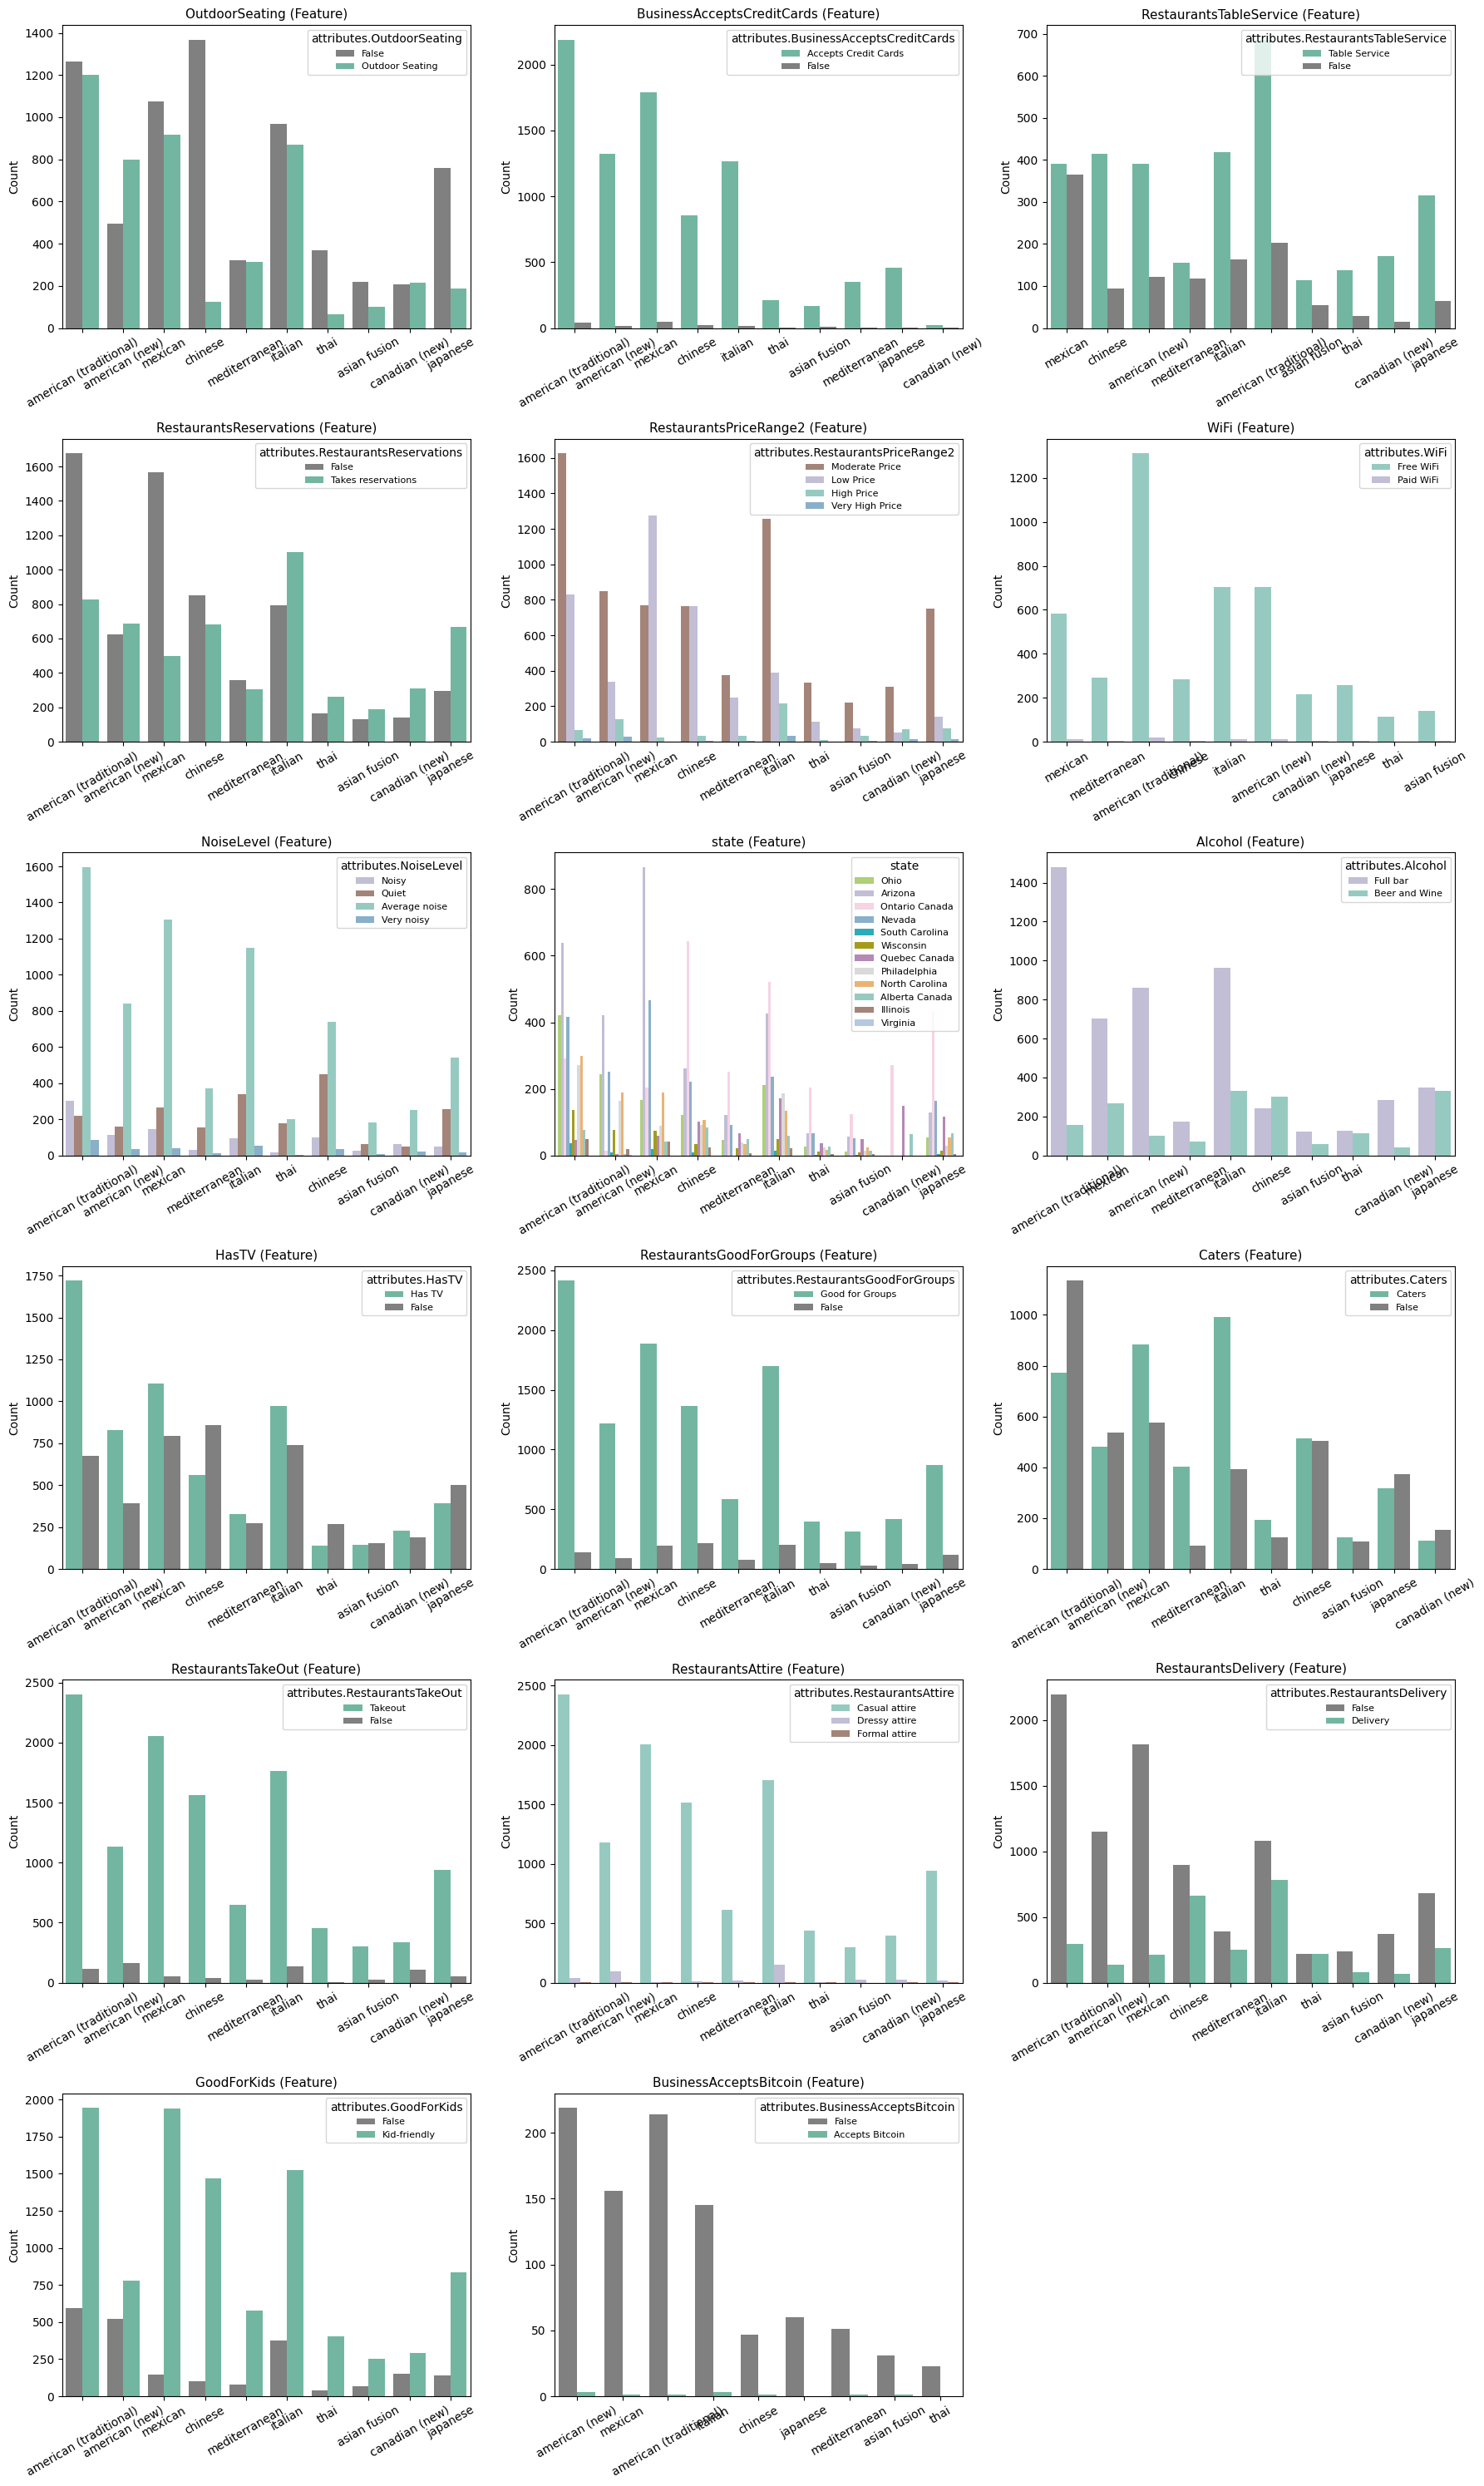

In [ ]:
#Count
plot_categorical_barplots(
    df_plot,
    features=feature_cols,
    x_axis='label',
    hue_axis='feature',
    percentage=False,
    # palette="Set2",
    drop_unknown=True,
    title_suffix='(Feature)'
)

Bar Plots by Feature and Label in terms of % of Total:

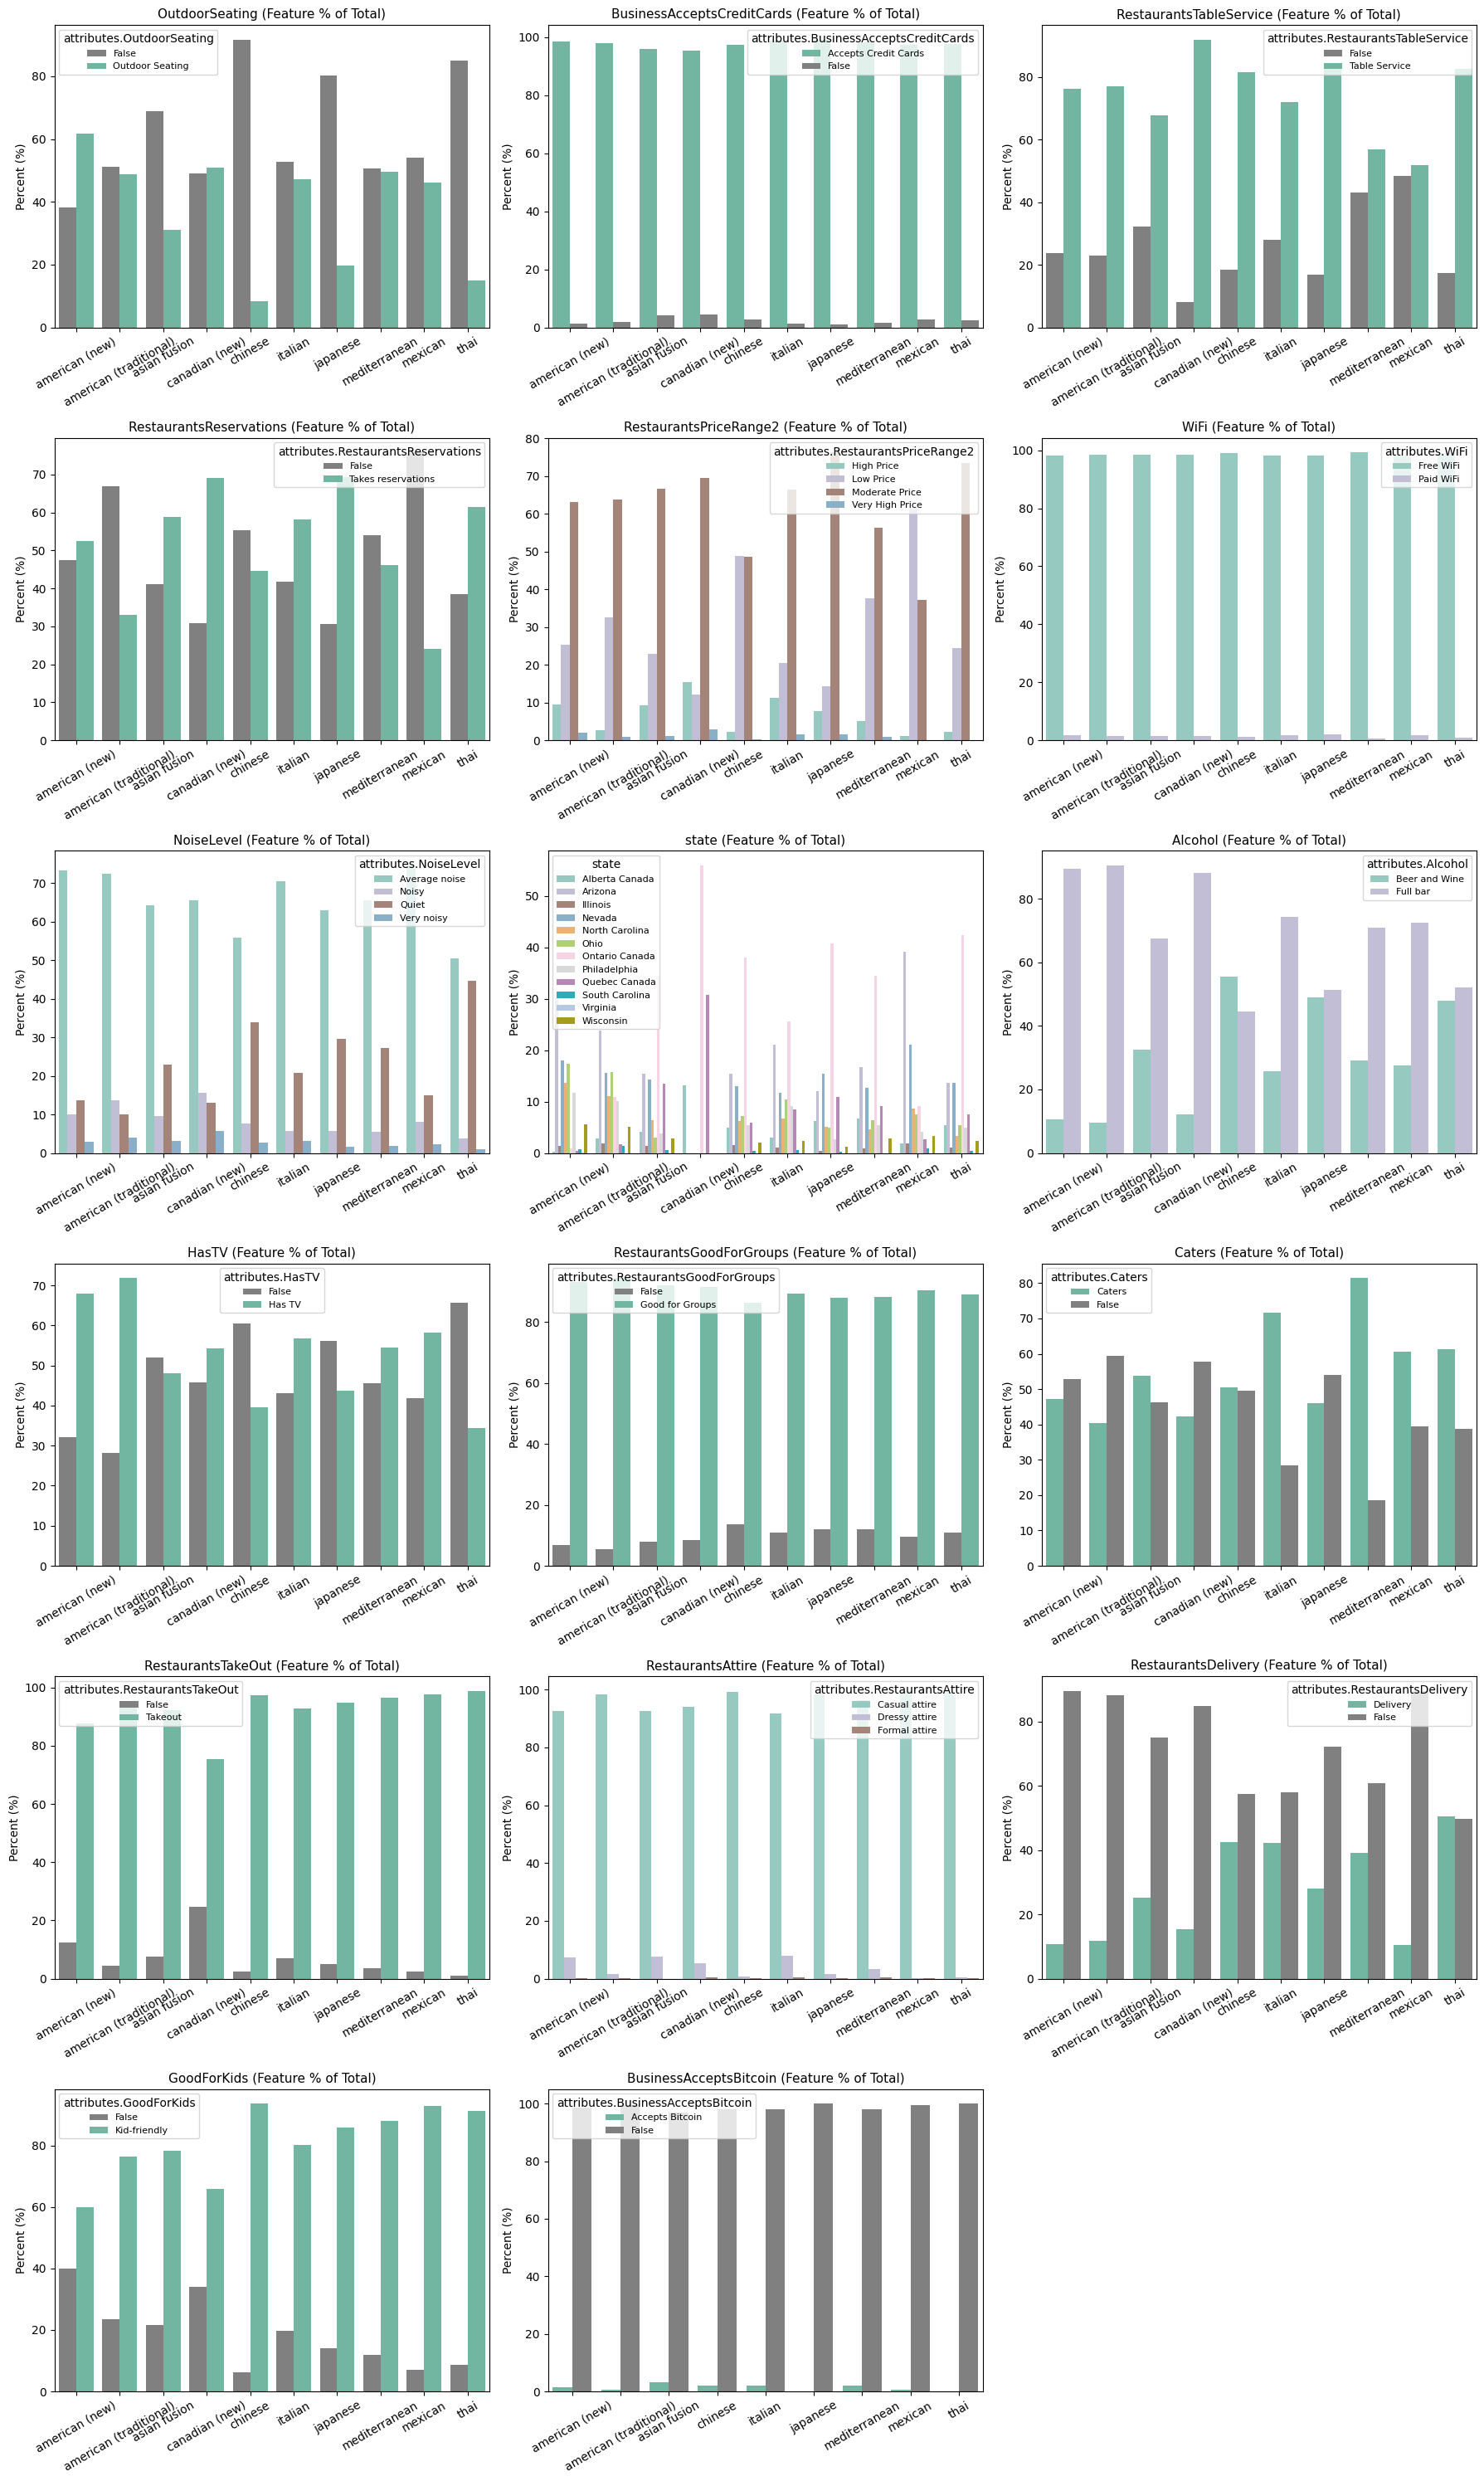

In [ ]:

# Percent of Total (excluding unknowns)
plot_categorical_barplots(
    df_plot,
    features=feature_cols,
    x_axis='label',
    hue_axis='feature',
    percentage=True,
    # palette="Set2",
    drop_unknown=True,
    title_suffix='(Feature % of Total)'
)

In [ ]:
# @title
fancy_header("Chi-Squared Tests")

Perform chi-squared to isolate most relvant features in predicting Restaurant Type. This isn't an exact science because NLP uses word embeddings and the words of the feature are important in relation to other words, not in isolation, so this just to get some good guesses at what might help to include:

Make a copy of the dataframe for the chi-squared to make sure to keep df_train intact:

In [ ]:
df_train_chi=df_train.copy()
df_train_chi.columns

Index(['attributes.Ambience', 'attributes.OutdoorSeating', 'name',
       'attributes.BusinessAcceptsCreditCards',
       'attributes.RestaurantsTableService',
       'attributes.RestaurantsReservations',
       'attributes.RestaurantsPriceRange2', 'attributes.WiFi',
       'attributes.NoiseLevel', 'state', 'attributes.Alcohol',
       'attributes.HasTV', 'attributes.RestaurantsGoodForGroups',
       'attributes.Caters', 'stars', 'attributes.RestaurantsTakeOut',
       'attributes.RestaurantsAttire', 'attributes.RestaurantsDelivery',
       'attributes.GoodForKids', 'attributes.GoodForMeal', 'label', 'review',
       'attributes.BusinessAcceptsBitcoin', 'text'],
      dtype='object')

Ambience, Business Parking, Name, and Good For Meal would be too lengthy to convert to dummies, so making a new df for the chi-squared that excludes those and converting to dummies on the other features:

In [ ]:
df_train_chi = df_train.drop(['attributes.Ambience','name', 'review', 'text', 'attributes.GoodForMeal'], axis=1)

Make dummy variables for chi squared:

In [ ]:
# Select only object (string-like) columns
space_cols = [
    col for col in df_train_chi.columns
    if (col.startswith("attributes.") or col.startswith("state")) and col != 'label']

# Make dummies for chi squared
df_train_chi = pd.get_dummies(df_train_chi, columns=space_cols, dummy_na=False)

# Clean up naming
df_train_chi.columns = df_train_chi.columns.str.strip().str.replace("attributes.", "", regex=False)
df_train_chi.columns = df_train_chi.columns.str.replace('2_', '', regex=False)

print(df_train_chi.columns)


Index(['stars', 'label', 'OutdoorSeating_', 'OutdoorSeating_False',
       'OutdoorSeating_Outdoor Seating', 'BusinessAcceptsCreditCards_',
       'BusinessAcceptsCreditCards_Accepts Credit Cards',
       'BusinessAcceptsCreditCards_False', 'RestaurantsTableService_',
       'RestaurantsTableService_False',
       'RestaurantsTableService_Table Service', 'RestaurantsReservations_',
       'RestaurantsReservations_False',
       'RestaurantsReservations_Takes reservations', 'RestaurantsPriceRange',
       'RestaurantsPriceRangeHigh Price', 'RestaurantsPriceRangeLow Price',
       'RestaurantsPriceRangeModerate Price',
       'RestaurantsPriceRangeVery High Price', 'WiFi_', 'WiFi_Free WiFi',
       'WiFi_Paid WiFi', 'NoiseLevel_', 'NoiseLevel_Average noise',
       'NoiseLevel_Noisy', 'NoiseLevel_Quiet', 'NoiseLevel_Very noisy',
       'state_Alberta Canada', 'state_Arizona', 'state_Illinois',
       'state_Nevada', 'state_North Carolina', 'state_Ohio',
       'state_Ontario Canada', 'st

Run chi-squared test of features vs. label as a whole:

For each feature, it tests whether the distribution of that feature differs across all classes (i.e., is dependent on the label).

High χ² → feature distribution is very different across labels → good at distinguishing between multiple classes.

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Ensure X and y are set correctly
X_chi = df_train_chi.drop('label', axis=1).values  # Feature matrix
y_chi = df_train_chi['label'].values               # Target labels

# If y is not already numeric, encode it
le = LabelEncoder()
y_chi_encoded = le.fit_transform(y_chi)

# Run Chi-squared test
chi2_stats, p_values = chi2(X_chi, y_chi_encoded)

# Create a DataFrame of results
feature_names = df_train_chi.drop('label', axis=1).columns
chi2_df = pd.DataFrame({
    'feature': feature_names,
    'chi2_stat': chi2_stats,
    'p_value': p_values
})

# Sort by chi2_stat to get top features
chi2_df_sorted = chi2_df.sort_values(by='chi2_stat', ascending=False)
print(chi2_df_sorted.head(20))  # Top 20 features overall


                                            feature    chi2_stat  \
4                       BusinessAcceptsCreditCards_  1808.871860   
32                             state_Ontario Canada  1366.010685   
58                     RestaurantsDelivery_Delivery  1037.811551   
15                   RestaurantsPriceRangeLow Price   882.824031   
5   BusinessAcceptsCreditCards_Accepts Credit Cards   876.996432   
3                    OutdoorSeating_Outdoor Seating   845.410789   
34                              state_Quebec Canada   795.195687   
40                                 Alcohol_Full bar   790.346506   
61                                GoodForKids_False   760.646219   
12       RestaurantsReservations_Takes reservations   561.728789   
27                                    state_Arizona   540.185285   
19                                   WiFi_Free WiFi   523.849376   
11                    RestaurantsReservations_False   515.265391   
2                              OutdoorSeating_Fa

For each class (Restaurant type) individually, tests whether the feature distinguishes that class vs all others (for optimization of individual class prediction if one or more in particular aren't performing well):

In [ ]:
from sklearn.feature_selection import chi2

results_per_class = {}

for class_label in np.unique(y_chi_encoded):
    # Create binary target: 1 if current class, 0 otherwise
    y_binary = (y_chi_encoded == class_label).astype(int)

    chi2_stats, p_values = chi2(X_chi, y_binary)

    results_df = pd.DataFrame({
        'feature': feature_names,
        'chi2_stat': chi2_stats,
        'p_value': p_values
    }).sort_values(by='chi2_stat', ascending=False)

    results_per_class[le.inverse_transform([class_label])[0]] = results_df

# Example: top 5 features for a specific class
print("Top features for each class:")
for label in le.classes_:
    print(f"\nTop features for class '{label}':")
    print(results_per_class[label].head(5))


Top features for each class:

Top features for class 'american (new)':
                                            feature   chi2_stat       p_value
4                       BusinessAcceptsCreditCards_  401.182989  3.043783e-89
61                                GoodForKids_False  386.689115  4.351799e-86
32                             state_Ontario Canada  323.963396  1.984285e-72
5   BusinessAcceptsCreditCards_Accepts Credit Cards  201.406694  1.030066e-45
3                    OutdoorSeating_Outdoor Seating  183.376583  8.875898e-42

Top features for class 'american (traditional)':
                         feature   chi2_stat       p_value
4    BusinessAcceptsCreditCards_  272.203662  3.755240e-61
58  RestaurantsDelivery_Delivery  202.655390  5.500284e-46
32          state_Ontario Canada  201.794369  8.477523e-46
19                WiFi_Free WiFi  186.922329  1.493305e-42
40              Alcohol_Full bar  186.535316  1.813980e-42

Top features for class 'asian fusion':
                 

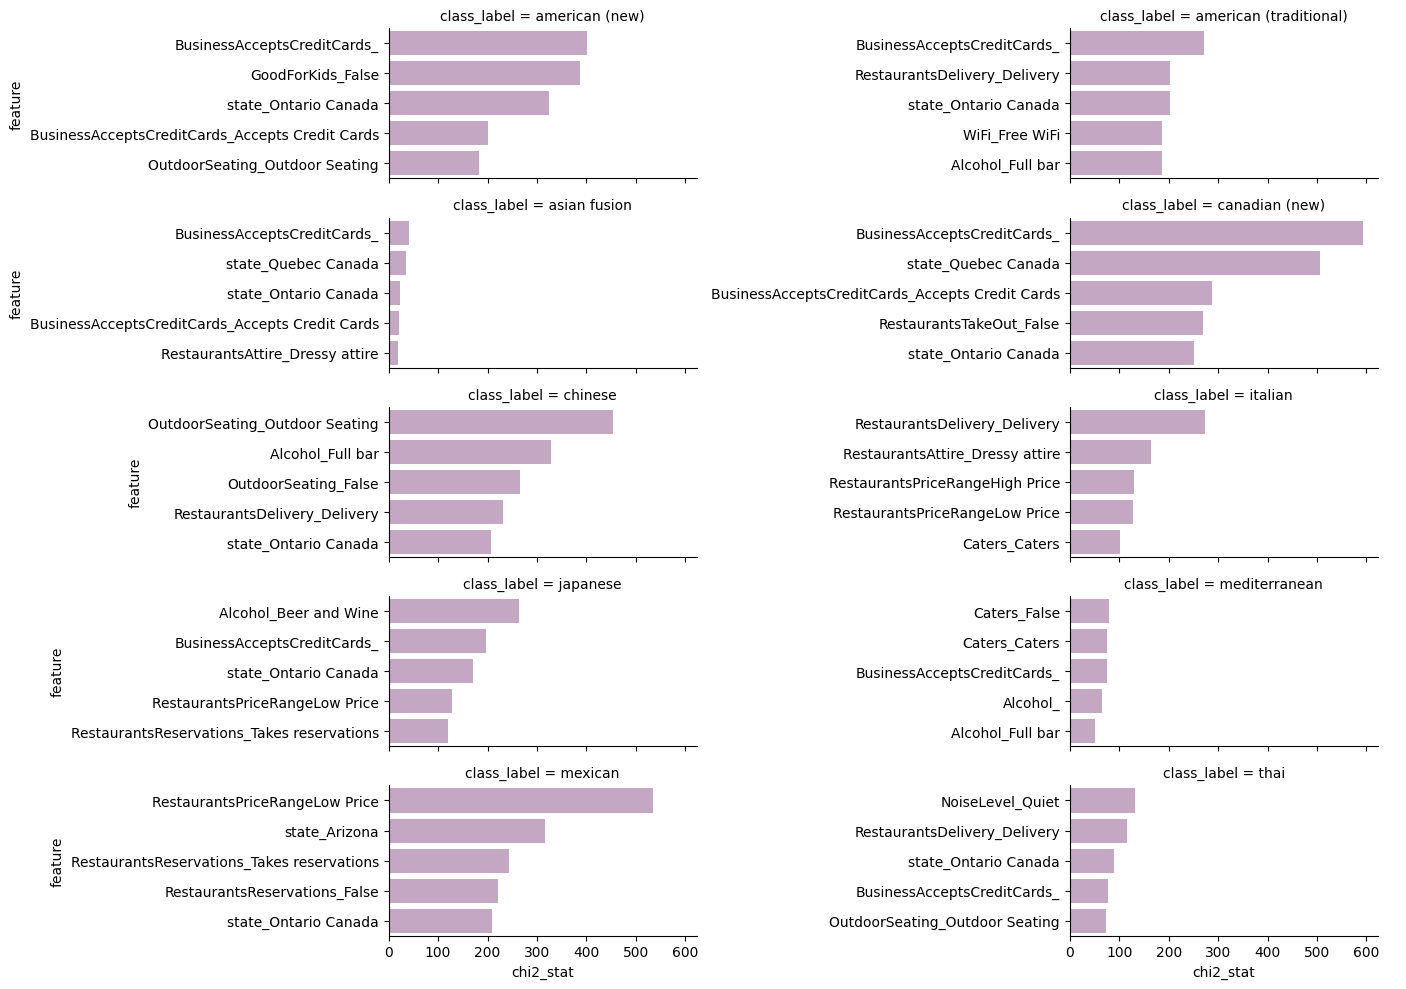

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Build DataFrame (top N features per class)
combined_rows = []
top_n = 5

for class_label in le.classes_:
    top_features = results_per_class[class_label].head(top_n).copy()
    top_features['class_label'] = class_label

    # Add a unique ID to feature names to avoid duplicates
    top_features['feature_display'] = top_features['feature'] + f" ({class_label})"

    combined_rows.append(top_features)

combined_df = pd.concat(combined_rows, ignore_index=True)

# Plot using catplot
g = sns.catplot(
    data=combined_df,
    x='chi2_stat',
    y='feature',
    col='class_label',
    kind='bar',
    col_wrap=2,
    height=2,
    aspect=3.5,
    sharey=False,
    color='#C8A2C8'
)


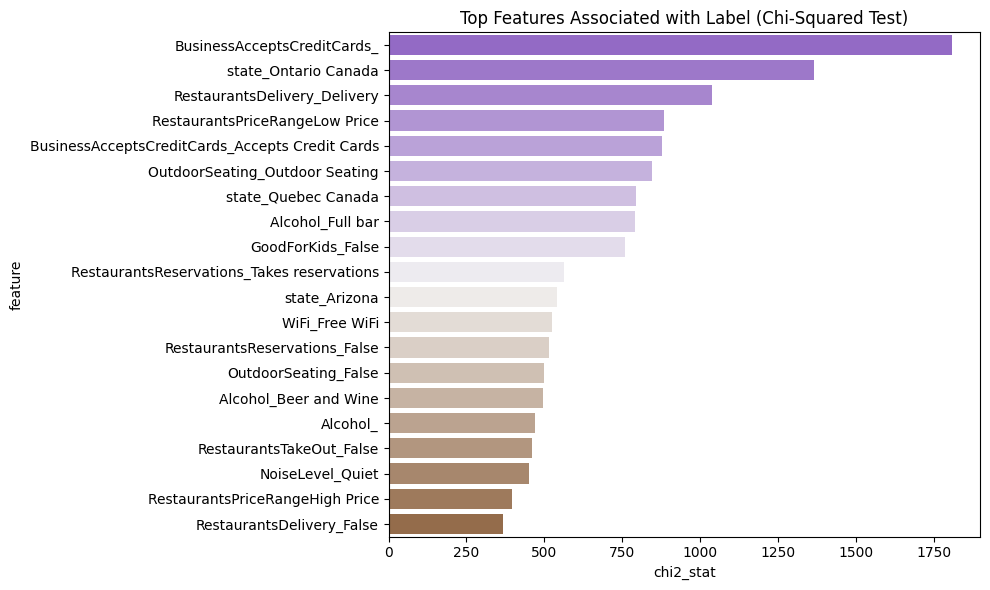

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
palette=sns.diverging_palette(280, 40, s=70, l=50, n=20, as_cmap=False)
sns.barplot(data=chi2_df_sorted.head(20), x='chi2_stat', y='feature',hue='feature', palette=palette, legend=False)


plt.title('Top Features Associated with Label (Chi-Squared Test)')
plt.tight_layout()
plt.show()

Final Edit: Filter out "False" for use in models:

In [ ]:
for col in df_train.columns:
    if col.startswith("attributes.") and col not in ["attributes.GoodForMeal", "attributes.Ambience"]:
        print(f"\nColumn: {col}")

        # Filter out string "False"
        unique_vals = df_train[col].dropna().astype(str)
        unique_vals = unique_vals[unique_vals != "False"]

        print(unique_vals.unique().tolist())



Column: attributes.OutdoorSeating
['Outdoor Seating', '']

Column: attributes.BusinessAcceptsCreditCards
['Accepts Credit Cards', '']

Column: attributes.RestaurantsTableService
['', 'Table Service']

Column: attributes.RestaurantsReservations
['Takes reservations', '']

Column: attributes.RestaurantsPriceRange2
['Moderate Price', '', 'Low Price', 'High Price', 'Very High Price']

Column: attributes.WiFi
['', 'Free WiFi', 'Paid WiFi']

Column: attributes.NoiseLevel
['Noisy', 'Quiet', '', 'Average noise', 'Very noisy']

Column: attributes.Alcohol
['Full bar', '', 'Beer and Wine']

Column: attributes.HasTV
['Has TV', '']

Column: attributes.RestaurantsGoodForGroups
['Good for Groups', '']

Column: attributes.Caters
['Caters', '']

Column: attributes.RestaurantsTakeOut
['Takeout', '']

Column: attributes.RestaurantsAttire
['Casual attire', '', 'Dressy attire', 'Formal attire']

Column: attributes.RestaurantsDelivery
['', 'Delivery']

Column: attributes.GoodForKids
['Kid-friendly', '']

C

#Dimension Reduction

In [ ]:
# @title
fancy_header("Dimension Reduction")

Drop additional features:

*   stars - not in top features
*   review was renamed to 'text' since the field is labeled 'text' in the tokenizing function later
*   table service - not in top features, likely correlated with price range
*   wifi, accepts reservations - Included originally but it did better without
*  accepts credit cards - having this as null was popping to the top so I think it was adding noise

I tested a handful of combinations (did not have the compute resources to do this super thoroughly).

In [ ]:
columns_to_drop = [
                  # 'name',
                  # 'state',
                  'stars',
                  'review', #bc renamed to 'text'
                  'attributes.RestaurantsTableService',
                  # 'attributes.RestaurantsAttire',
                  # 'attributes.RestaurantsDelivery',
                  # 'attributes.GoodForKids',
                  # 'attributes.GoodForMeal'
                  # 'attributes.RestaurantsGoodForGroups',
                  # 'attributes.HasTV',
                  # 'attributes.BusinessAcceptsBitcoin',
                  # 'attributes.RestaurantsTakeOut',
                  # 'attributes.Ambience',
                  # 'attributes.OutdoorSeating',
                  'attributes.BusinessAcceptsCreditCards',
                  'attributes.RestaurantsReservations',
                  # 'attributes.RestaurantsPriceRange2',
                  'attributes.WiFi',
                  # 'attributes.NoiseLevel',
                  # 'attributes.Alcohol',
                  # 'attributes.Caters'
                  ]

df_train = df_train.drop(columns_to_drop, axis=1)
df_test = df_test.drop(columns_to_drop, axis=1)

In [ ]:
df_train.columns

Index(['attributes.Ambience', 'attributes.OutdoorSeating', 'name',
       'attributes.RestaurantsPriceRange2', 'attributes.NoiseLevel', 'state',
       'attributes.Alcohol', 'attributes.HasTV',
       'attributes.RestaurantsGoodForGroups', 'attributes.Caters',
       'attributes.RestaurantsTakeOut', 'attributes.RestaurantsAttire',
       'attributes.RestaurantsDelivery', 'attributes.GoodForKids',
       'attributes.GoodForMeal', 'label', 'attributes.BusinessAcceptsBitcoin',
       'text'],
      dtype='object')

In [ ]:
# @title
fancy_header("Concatenating Features")

This is the finalization of the data that will go into the model. The restaurant review (called 'text' in the data) starts as the primary source of what would be used in the model to predict restaurant type. All of these other features I have formatted and included are additional to that data and were added to supplement it, so I wanted them to be as succinct and meaningful as possible. The model is essentially predicting from the 'review + other features' to predict the type. The method here to get the single field of data to input into the natural language model is to concatenate the words of the additional features to the review to create one long piece of text. Note using a separator between the features (a period here) is helpful for the model to compartmentalize unrelated text.

View restaurant review field separately first before concatenating with other features:

One example of "text" value (one restaurant review) before adding features to it:

In [ ]:
print(df_train['text'].iloc[0])

So, we stopped here on our way to the Side Quest, which is just up the street. \n\nWe did not know what to expect, but came on a 3$ taco night...\n\nIm so glad we did:)\n\nMostly, the Rush Inn is a bar-ish place, but theres plenty of back and side seating at booths all through. The place has a dark, rich wood tone, and the patrons were decent folks.\n\nThe tacos were EXCEPTIONAL, and their selection is quite good, with all sorts of stuff I intend to try as soon as possible. I think this place would make a nice casual dinner/lunch stop, and if you need to get beverage, the barkeep and wait staff will keep em coming! \n\nSo, for a quick tasty bite, dont walk slow, RUSH IN TO THE RUSH INN! My boyfriend and I heard about this little place near Rush Inn that offered board games and poutine on Friday. When we arrived, they didnt have food because the chef didnt show up (?) so we ventured to this place a block down. Great vibe inside. A typical bar scene, but had great booze selections and a 

Concatenate 'text' (review) field with other features:

In [ ]:
# Get all column names except 'label'
fields_to_concat = [col for col in df_train.columns if col != 'label']

# Concatenate with periods between values
df_train["concatenated"] = df_train[fields_to_concat]\
    .fillna("").astype(str)\
    .apply(lambda row: ".".join(row.values), axis=1)


In [ ]:
# Ensure all fields are strings and fill NaNs with empty string
df_train[fields_to_concat] = df_train[fields_to_concat].fillna('').astype(str)

# Concatenate only non-empty fields, separated by '. '
df_train["text_review_and_features"] = df_train[fields_to_concat].apply(
    lambda row: '. '.join([val for val in row if val.strip() != '']),
    axis=1
)


In [ ]:
# Ensure all fields are strings and fill NaNs with empty string
df_test[fields_to_concat] = df_test[fields_to_concat].fillna('').astype(str)

# Concatenate only non-empty fields, separated by '. '
df_test["text_review_and_features"] = df_test[fields_to_concat].apply(
    lambda row: '. '.join([val for val in row if val.strip() != '']),
    axis=1
)


This is the final text field that will be fed into the natural language model. It is a concatenation of features (as text) joined to the restaurant review text, which will be used as one big text field to predict the restaurant type:

One example of new "text" value (restaurant review + additional features):

In [ ]:
print(df_train['text_review_and_features'].iloc[0])

casual. False. Rush Inn. Moderate Price. Noisy. Ohio. Full bar. Has TV. Good for Groups. Caters. Takeout. Casual attire. False. False. Good for lunch, Good for dinner. So, we stopped here on our way to the Side Quest, which is just up the street. \n\nWe did not know what to expect, but came on a 3$ taco night...\n\nIm so glad we did:)\n\nMostly, the Rush Inn is a bar-ish place, but theres plenty of back and side seating at booths all through. The place has a dark, rich wood tone, and the patrons were decent folks.\n\nThe tacos were EXCEPTIONAL, and their selection is quite good, with all sorts of stuff I intend to try as soon as possible. I think this place would make a nice casual dinner/lunch stop, and if you need to get beverage, the barkeep and wait staff will keep em coming! \n\nSo, for a quick tasty bite, dont walk slow, RUSH IN TO THE RUSH INN! My boyfriend and I heard about this little place near Rush Inn that offered board games and poutine on Friday. When we arrived, they did

In [ ]:
print(df_test['text_review_and_features'].iloc[0])

Outdoor Seating. Fuse. Moderate Price. Ontario Canada. Full bar. Has TV. Good for Groups. False. Takeout. Casual attire. False. False. Overall wonderful experience. \n\nThe owner Farley Flex came by and paid our table a visit. Staff are very friendly, helpful and service was quick given we were a table of 12. \n\nThe restaurant has a very relaxed/soulful vibe; beautiful artwork on the walls and live entertainment every weekend starting in June (I will be going back for that).\n\nNo complaints! Fav spot close to home and the escovich tacos are to die for!! Great atmosphere but on the pricey side... The music is incredible, the food is great, if a bit salty, the service is sweet. \n\nThe service is the drawback. No recommendations for the new restaurant because they havent tried it yet. Not sure whats available for beer/wine and gone for 3-4 minutes to get a drink menu. Make no mistake, service will get better, and food is worth the visit. \nSo is the music, at least this night. \nJust c

#Average Embedding Models

In [ ]:
# @title
fancy_header("Average Embedding Models")

In [ ]:
# @title
fancy_header("Load Libraries")

Load libraries for Average Embedding Models:

In [ ]:
import pickle
import pandas as pd
import itertools
from collections import Counter
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from gensim.models import word2vec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import os
import string


# NLTK library downloads
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

##Data Pre-Processing

In [ ]:
# @title
fancy_header("Data Pre-Processing")

Data Pre-Processing for Average Word Embeddings:


1.   TEXT PRE-PROCESSING | pre-process_df: Clean the data of stopwords, punctuation and single character words
2.   TOKENIZATION | tokenize_text_column: Tokenize the Training and Test Data sentences (with nltk tokenizer)
3.   BUILD VOCABULARY | build_vocab: Build vocabulary from Tokenized Data
4.   inp_data: Create Input Data (indices only) to build sentences of indices of words using Vocabulary and Tokenized Data
5.   WORD EMBEDDINGS | get_embeddings: Train Word2Vec Skigram model to get word embedding weights matrix (W) using Vocabulary and Input Data
6.   AVERAGE EMBEDDING VECTORS | average_embedding_vectors: Build Avg. Word Embedding Vectors for training and test sets (1 vector for each review)



In [ ]:
# @title
fancy_header("Functions")

Functions for Steps 1-2 and 4-6:

In [ ]:
# @title
fancy_header("Text Pre-processing")

Function to pre-process raw (English) text:

In [ ]:
def preprocess_df(df):
    # get English stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.add('would')
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    preprocessed_sentences = []
    for i, row in df.iterrows():
        sent = row["text"]
        sent_nopuncts = sent.translate(translator)
        words_list = sent_nopuncts.strip().split()
        filtered_words = [word for word in words_list if word not in stop_words and len(word) != 1]
        preprocessed_sentences.append(" ".join(filtered_words))
    df["text"] = preprocessed_sentences
    return df

In [ ]:
# @title
fancy_header("Build Vocabulary")

Function to build a vocabulary based on descending word frequencies:

In [ ]:
def build_vocab(sentences):
    word_counts = Counter(itertools.chain(*sentences))
    vocabulary_inv = [x[0] for x in word_counts.most_common()]
    vocabulary = {x: i for i, x in enumerate(vocabulary_inv)}
    return word_counts, vocabulary, vocabulary_inv

In [ ]:
# @title
fancy_header("Word Embeddings")

Function to learn word embeddings through Word2vec module and skigram (builds matrix W):

In [ ]:

def get_embeddings(inp_data, vocabulary_inv, size_features=100, #100 features originally
                   mode='skipgram',
                   min_word_count=2, #2 originally
                   context=5): #5 originally
    model_name = "embedding"
    model_name = os.path.join(model_name)
    num_workers = 15  #15 originally
    downsampling = 1e-3  # Downsample setting for frequent words
    print('Training Word2Vec model...')
    sentences = [[vocabulary_inv[w] for w in s] for s in inp_data]
    if mode == 'skipgram':
        sg = 1
        print('Model: skip-gram')
    elif mode == 'cbow':
        sg = 0
        print('Model: CBOW')
    embedding_model = word2vec.Word2Vec(sentences, workers=num_workers,
                                        sg=sg,
                                        vector_size=size_features,
                                        min_count=min_word_count,
                                        window=context,
                                        sample=downsampling,
                                        seed=42)
    print("Saving Word2Vec model {}".format(model_name))
    embedding_weights = np.zeros((len(vocabulary_inv), size_features)) #W
    for i in range(len(vocabulary_inv)):
        word = vocabulary_inv[i]
        if word in embedding_model.wv:
            embedding_weights[i] = embedding_model.wv[word]
        else:
            embedding_weights[i] = np.random.uniform(-0.25, 0.25,
                                                     embedding_model.vector_size)
    return embedding_weights

In [ ]:
# @title
fancy_header("Tokenization")

In [ ]:
from nltk.tokenize import word_tokenize

def tokenize_text_column(df, column="text"):
    """
    Tokenizes each row in the specified text column using NLTK's word_tokenize.
    """
    return [word_tokenize(str(text)) for text in df[column]]

In [ ]:
# @title
fancy_header("Average Embedding Vectors")

In [ ]:
def average_embedding_vectors(tokenized_docs, embedding_weights, vocabulary):
    vectors = []
    embedding_dim = embedding_weights.shape[1]

    for doc in tokenized_docs:
        vec = np.zeros(embedding_dim)
        count = 0
        for word in doc:
            if word in vocabulary:
                vec += embedding_weights[vocabulary[word]]
                count += 1
        if count > 0:
            vec /= count
        vectors.append(vec)

    return vectors

##Model 1

In [ ]:
# @title
fancy_header("Model 1")

In [ ]:
# @title
fancy_header("Run Pre-Processing")

In [ ]:
import random
import numpy as np

random.seed(42)
np.random.seed(42)

In [ ]:
# Step 1 Pre-process/tokenize "text"
df_train_1 = preprocess_df(df_train)
df_test_1 = preprocess_df(df_test)

In [ ]:
# Step 2 Tokenize sentences
train_1_tokenized = tokenize_text_column(df_train_1, column="text")
test_1_tokenized  = tokenize_text_column(df_test_1, column="text")

In [ ]:
# Step 3 Build Vocabulary of "text"
word_counts, vocabulary, vocabulary_inv = build_vocab(train_1_tokenized)

In [ ]:
# use the above mapping to create input data (indices only) to build sentences of indices

# Step 4 Create Input Data
inp_data = [[vocabulary[word] for word in text] for text in train_1_tokenized] #tagged data is in sentences
# get embedding vector

# Step 5 Word Embeddings
embedding_weights = get_embeddings(inp_data, vocabulary_inv)

#Trains Word2Vec model -> not using pre-trained embeddings, training them here

Training Word2Vec model...
Model: skip-gram
Saving Word2Vec model embedding


In [ ]:
print(embedding_weights[0])

[-0.05858616  0.1277822  -0.12066676  0.00857871  0.04020534  0.10076094
 -0.18086065 -0.14457613 -0.14242828 -0.10503063 -0.08661736  0.19392838
  0.35138571  0.16327697 -0.05051116 -0.0622387   0.00432778 -0.50817877
 -0.14356142  0.1833677  -0.20883882  0.03831716 -0.09281054  0.07760908
  0.18624204  0.32021934  0.03972424  0.37641791  0.01762534 -0.32021108
 -0.11542011 -0.32707542  0.06544241 -0.22123197  0.27382272  0.07864743
  0.14052248 -0.57827878 -0.20899378  0.49131113 -0.2957871   0.45241517
  0.09165096 -0.22121012 -0.25564316 -0.00636616  0.30949235 -0.01012761
  0.42129076  0.01469701  0.12141861 -0.53111941 -0.03033756  0.42583275
  0.11579765 -0.10556558  0.05865773 -0.0545969  -0.00317073  0.31211668
  0.14611121  0.05392457 -0.52208447  0.49334064  0.17951988  0.07938548
  0.21027604  0.09792924 -0.38942045  0.1626499   0.09588171 -0.324889
  0.08666616 -0.24896237  0.19224326 -0.36846277 -0.41608444 -0.16571234
 -0.27596259 -0.41901758  0.31783623 -0.40549201 -0.2

In [ ]:
#Step 6 Create Average Word Embedding Vectors
train_vec_1 = average_embedding_vectors(train_1_tokenized, embedding_weights, vocabulary)
test_vec_1  = average_embedding_vectors(test_1_tokenized, embedding_weights, vocabulary)


In [ ]:
print(train_1_tokenized[0]) #tagged data is in sentences
# print(vocabulary)

['So', 'stopped', 'way', 'Side', 'Quest', 'street', 'nWe', 'know', 'expect', 'came', 'taco', 'night', 'nIm', 'glad', 'nMostly', 'Rush', 'Inn', 'bar', 'ish', 'place', 'theres', 'plenty', 'back', 'side', 'seating', 'booths', 'The', 'place', 'dark', 'rich', 'wood', 'tone', 'patrons', 'decent', 'folks', 'nThe', 'tacos', 'EXCEPTIONAL', 'selection', 'quite', 'good', 'sorts', 'stuff', 'intend', 'try', 'soon', 'possible', 'think', 'place', 'make', 'nice', 'casual', 'dinner', 'lunch', 'stop', 'need', 'get', 'beverage', 'barkeep', 'wait', 'staff', 'keep', 'em', 'coming', 'nSo', 'quick', 'tasty', 'bite', 'dont', 'walk', 'slow', 'RUSH', 'IN', 'TO', 'THE', 'RUSH', 'INN', 'My', 'boyfriend', 'heard', 'little', 'place', 'near', 'Rush', 'Inn', 'offered', 'board', 'games', 'poutine', 'Friday', 'When', 'arrived', 'didnt', 'food', 'chef', 'didnt', 'show', 'ventured', 'place', 'block', 'Great', 'vibe', 'inside', 'typical', 'bar', 'scene', 'great', 'booze', 'selections', 'decently', 'large', 'menu', 'choose

In [ ]:
print(inp_data[0])

[126, 588, 81, 3132, 22016, 443, 165, 69, 357, 30, 317, 65, 1401, 657, 22017, 16115, 2997, 49, 2555, 3, 655, 625, 9, 100, 452, 1331, 0, 3, 903, 1262, 1815, 3405, 1164, 193, 1344, 22, 150, 15250, 240, 148, 2, 4033, 526, 7413, 33, 441, 1313, 77, 3, 66, 26, 887, 72, 44, 375, 231, 11, 2525, 18554, 92, 47, 414, 3435, 194, 780, 201, 116, 415, 48, 445, 334, 24562, 3259, 1964, 1323, 24562, 34054, 34, 627, 682, 35, 3, 539, 16115, 2997, 606, 1714, 1107, 1459, 558, 205, 347, 62, 1, 473, 62, 709, 4589, 3, 2453, 123, 992, 208, 644, 49, 1857, 6, 4277, 1379, 3200, 173, 23, 538, 18, 417, 17, 889, 3201, 1601, 627, 18, 546, 527, 186, 44978, 8474, 3116, 165, 251, 6170, 1492, 46, 7685, 2, 1810, 91, 1271, 5102, 141, 165, 57, 71, 9, 7686, 75, 644, 49, 1, 3042, 49, 1577, 104, 769, 114, 136, 54, 1396, 485, 136, 54, 1339, 1380, 200, 725, 44979, 41, 472, 22, 3, 922, 0, 23, 251, 3602, 115, 404, 95, 636, 158, 65, 4369, 134, 844, 47, 1184, 38, 1397, 442, 1127, 6, 6, 413, 49, 344, 15, 2, 1, 49, 1, 2511, 2, 1, 34055

In [ ]:
print(f"{'word_counts':<15} {'vocabulary':<15} {'vocabulary_inv':<15}")
print("-" * 45)

for i, word in enumerate(vocabulary_inv[:10]):  # First 20 entries
    count = word_counts[word]
    index = vocabulary[word]
    print(f"{str(count):<15} {str({word: index}):<15} {word:<15}")

word_counts     vocabulary      vocabulary_inv 
---------------------------------------------
58584           {'The': 0}      The            
51277           {'food': 1}     food           
38118           {'good': 2}     good           
37118           {'place': 3}    place          
23989           {'like': 4}     like           
21304           {'service': 5}  service        
21233           {'great': 6}    great          
19641           {'time': 7}     time           
19532           {'We': 8}       We             
18648           {'back': 9}     back           


In [ ]:
# @title
fancy_header("Split Data")

Split data into 80/10/10 Train, Validation, Test split:

In [ ]:
X_1 = train_vec_1
y_1 = df_train_1['label']

# Train (80%), Temp (20%) split
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(
    X_1,y_1,
    test_size=0.2,
    random_state=42,
    stratify=y_1
)

# Temp → Validation (10%), Test (10%) split
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(
    X_temp_1,
    y_temp_1,
    test_size=0.5,
    random_state=42,
    stratify=y_temp_1
)

# Delete temp vars and print shapes with % of total
del X_temp_1, y_temp_1
total_samples = len(df_train_1)

X_train_1_for_shape = np.array(X_train_1)
y_train_1_for_shape = np.array(y_train_1)
X_val_1_for_shape = np.array(X_val_1)
y_val_1_for_shape = np.array(y_val_1)
X_test_1_for_shape = np.array(X_test_1)
y_test_1_for_shape = np.array(y_test_1)


print(f"the shape of the training set (input) is: {X_train_1_for_shape.shape} ({len(X_train_1_for_shape)/total_samples:.1%} of total)")
print(f"the shape of the training set (target) is: {y_train_1_for_shape.shape} ({len(y_train_1_for_shape)/total_samples:.1%} of total)\n")

print(f"the shape of the cross validation set (input) is: {X_val_1_for_shape.shape} ({len(X_val_1_for_shape)/total_samples:.1%} of total)")
print(f"the shape of the cross validation set (target) is: {y_val_1_for_shape.shape} ({len(y_val_1_for_shape)/total_samples:.1%} of total)\n")

print(f"the shape of the test set (input) is: {X_test_1_for_shape.shape} ({len(X_test_1_for_shape)/total_samples:.1%} of total)")
print(f"the shape of the test set (target) is: {y_test_1_for_shape.shape} ({len(y_test_1_for_shape)/total_samples:.1%} of total)")


the shape of the training set (input) is: (10515, 100) (80.0% of total)
the shape of the training set (target) is: (10515,) (80.0% of total)

the shape of the cross validation set (input) is: (1314, 100) (10.0% of total)
the shape of the cross validation set (target) is: (1314,) (10.0% of total)

the shape of the test set (input) is: (1315, 100) (10.0% of total)
the shape of the test set (target) is: (1315,) (10.0% of total)


In [ ]:
# @title
fancy_header("Train Model")

Train average word embedding feature against labels using Logistic Regression:

In [ ]:
clf_val_1 = LogisticRegression(max_iter=1000).fit(X_train_1, y_train_1)

In [ ]:
# @title
fancy_header("Model Accuracy: Validation Set")

Evaluate Accuracy of model's Restaurant Predictions:

In [ ]:
preds_val_1 = clf_val_1.predict(X_val_1)

val_accuracy_1 = accuracy_score(y_val_1, preds_val_1)
print(f"Validation Accuracy: {val_accuracy_1:.4f}")

Validation Accuracy: 0.7557


In [ ]:
# @title
fancy_header("Classification Report")

Evaluate accuracy on individual Restaurant Types:

*Improvements were optimized to the F1 score during modeling*

In [ ]:
classification_report_val_1 = classification_report(y_val_1, preds_val_1)
print(classification_report_val_1)

                        precision    recall  f1-score   support

        american (new)       0.55      0.28      0.37       140
american (traditional)       0.62      0.88      0.73       268
          asian fusion       0.00      0.00      0.00        36
        canadian (new)       0.36      0.10      0.16        49
               chinese       0.74      0.91      0.82       169
               italian       0.81      0.90      0.85       203
              japanese       0.82      0.79      0.81       106
         mediterranean       0.95      0.74      0.83        73
               mexican       0.94      0.95      0.95       221
                  thai       0.88      0.57      0.69        49

              accuracy                           0.76      1314
             macro avg       0.67      0.61      0.62      1314
          weighted avg       0.73      0.76      0.73      1314



In [ ]:
# @title
fancy_header("Confusion Matrix")

Run confusion matrix to see where exactly predictions are going wrong:

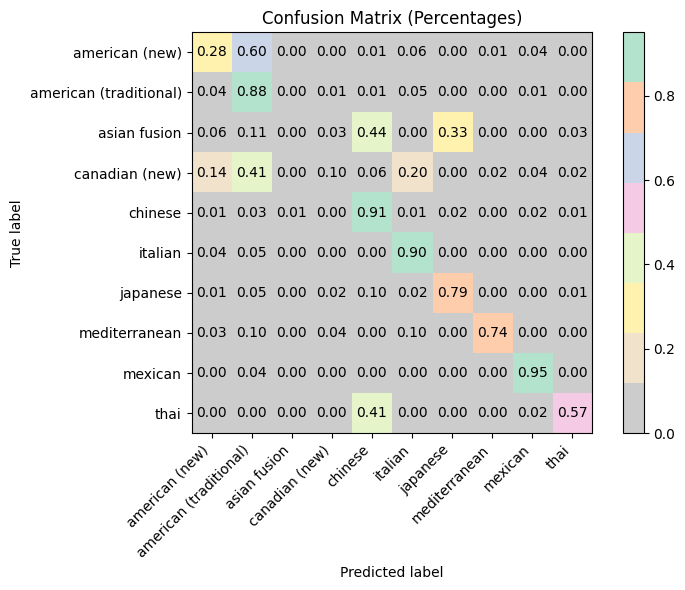

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val_1, preds_val_1, labels=clf_val_1.classes_)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # row-wise %

disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=clf_val_1.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Pastel2_r, values_format=".2f", ax=ax)
# Improve readability
for text in ax.texts:
    text.set_color("black")

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.title("Confusion Matrix (Percentages)")
plt.tight_layout()
plt.show()

##Model 2

In [ ]:
# @title
fancy_header("Model 2")

Run pre-processing steps on Restaurant Review + Other Features field this time (instead of just the Review only like in Model 1):

In [ ]:
import random
import numpy as np

random.seed(42)
np.random.seed(42)

In [ ]:
df_train_2=df_train.copy()
df_train_2["text"]=df_train_2["text_review_and_features"]

df_test_2=df_test.copy()
df_test_2["text"]=df_test_2["text_review_and_features"]

# Step 1 Pre-process/tokenize "text"
df_train_2 = preprocess_df(df_train_2)
df_test_2 = preprocess_df(df_test_2)

# Step 2 Tokenize sentences
train_2_tokenized = tokenize_text_column(df_train_2, column="text")
test_2_tokenized  = tokenize_text_column(df_test_2, column="text")

# Step 3 Build Vocabulary of "text"
word_counts, vocabulary, vocabulary_inv = build_vocab(train_2_tokenized)

# Step 4 Create Input Data
inp_data = [[vocabulary[word] for word in text] for text in train_2_tokenized] #tagged data is in sentences

# Step 5 Word Embeddings
embedding_weights = get_embeddings(inp_data, vocabulary_inv)

#Step 6 Create Average Word Embedding Vectors
train_vec_2 = average_embedding_vectors(train_2_tokenized, embedding_weights, vocabulary)
test_vec_2  = average_embedding_vectors(test_2_tokenized, embedding_weights, vocabulary)

Training Word2Vec model...
Model: skip-gram
Saving Word2Vec model embedding


In [ ]:
print(train_2_tokenized[0]) #tagged data is in sentences

['casual', 'False', 'Rush', 'Inn', 'Moderate', 'Price', 'Noisy', 'Ohio', 'Full', 'bar', 'Has', 'TV', 'Good', 'Groups', 'Caters', 'Takeout', 'Casual', 'attire', 'False', 'False', 'Good', 'lunch', 'Good', 'dinner', 'So', 'stopped', 'way', 'Side', 'Quest', 'street', 'nWe', 'know', 'expect', 'came', 'taco', 'night', 'nIm', 'glad', 'nMostly', 'Rush', 'Inn', 'bar', 'ish', 'place', 'theres', 'plenty', 'back', 'side', 'seating', 'booths', 'The', 'place', 'dark', 'rich', 'wood', 'tone', 'patrons', 'decent', 'folks', 'nThe', 'tacos', 'EXCEPTIONAL', 'selection', 'quite', 'good', 'sorts', 'stuff', 'intend', 'try', 'soon', 'possible', 'think', 'place', 'make', 'nice', 'casual', 'dinner', 'lunch', 'stop', 'need', 'get', 'beverage', 'barkeep', 'wait', 'staff', 'keep', 'em', 'coming', 'nSo', 'quick', 'tasty', 'bite', 'dont', 'walk', 'slow', 'RUSH', 'IN', 'TO', 'THE', 'RUSH', 'INN', 'My', 'boyfriend', 'heard', 'little', 'place', 'near', 'Rush', 'Inn', 'offered', 'board', 'games', 'poutine', 'Friday', '

In [ ]:
# @title
fancy_header("Split Data")

Split data into 80/10/10 Train, Validation, Test split:

In [ ]:
X_2=train_vec_2
y_2=df_train_2['label']

# Train (80%), Temp (20%) split
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(
    X_2,y_2,
    test_size=0.2,
    random_state=42,
    stratify=y_2
)

# Temp → Validation (10%), Test (10%) split
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(
    X_temp_2,
    y_temp_2,
    test_size=0.5,
    random_state=42,
    stratify=y_temp_2
)

# Delete temp vars and print shapes with % of total
del X_temp_2, y_temp_2
total_samples_2 = len(df_train_2)

X_train_2_for_shape = np.array(X_train_2)
y_train_2_for_shape = np.array(y_train_2)
X_val_2_for_shape = np.array(X_val_2)
y_val_2_for_shape = np.array(y_val_2)
X_test_2_for_shape = np.array(X_test_2)
y_test_2_for_shape = np.array(y_test_2)


print(f"the shape of the training set (input) is: {X_train_2_for_shape.shape} ({len(X_train_2_for_shape)/total_samples_2:.1%} of total)")
print(f"the shape of the training set (target) is: {y_train_2_for_shape.shape} ({len(y_train_2_for_shape)/total_samples_2:.1%} of total)\n")

print(f"the shape of the cross validation set (input) is: {X_val_2_for_shape.shape} ({len(X_val_2_for_shape)/total_samples_2:.1%} of total)")
print(f"the shape of the cross validation set (target) is: {y_val_2_for_shape.shape} ({len(y_val_2_for_shape)/total_samples_2:.1%} of total)\n")

print(f"the shape of the test set (input) is: {X_test_2_for_shape.shape} ({len(X_test_2_for_shape)/total_samples_2:.1%} of total)")
print(f"the shape of the test set (target) is: {y_test_2_for_shape.shape} ({len(y_test_2_for_shape)/total_samples_2:.1%} of total)")


the shape of the training set (input) is: (10515, 100) (80.0% of total)
the shape of the training set (target) is: (10515,) (80.0% of total)

the shape of the cross validation set (input) is: (1314, 100) (10.0% of total)
the shape of the cross validation set (target) is: (1314,) (10.0% of total)

the shape of the test set (input) is: (1315, 100) (10.0% of total)
the shape of the test set (target) is: (1315,) (10.0% of total)


In [ ]:
# @title
fancy_header("Train Model")

Train model on Logistic Regression:

In [ ]:
clf_val_2 = LogisticRegression(max_iter=1000).fit(X_train_2, y_train_2)

In [ ]:
# @title
fancy_header("Model Accuracy: Validation Set")

Evaluate Accuracy:

In [ ]:
preds_val_2 = clf_val_2.predict(X_val_2)

val_accuracy_2 = accuracy_score(y_val_2, preds_val_2)
print(f"Validation Accuracy: {val_accuracy_2:.4f}")

Validation Accuracy: 0.7633


Evaluate Accuracy of individual Restaurant Type predictions:

In [ ]:
classification_report_val_2 = classification_report(y_val_2, preds_val_2)
print(classification_report_val_2)

                        precision    recall  f1-score   support

        american (new)       0.54      0.32      0.40       140
american (traditional)       0.64      0.89      0.74       268
          asian fusion       0.00      0.00      0.00        36
        canadian (new)       0.38      0.10      0.16        49
               chinese       0.74      0.91      0.81       169
               italian       0.84      0.91      0.87       203
              japanese       0.84      0.79      0.82       106
         mediterranean       0.95      0.73      0.82        73
               mexican       0.95      0.95      0.95       221
                  thai       0.82      0.57      0.67        49

              accuracy                           0.76      1314
             macro avg       0.67      0.62      0.63      1314
          weighted avg       0.74      0.76      0.74      1314



In [ ]:
# @title
fancy_header("Confusion Matrix")

Run confusion matrix to see where predictions are going wrong:


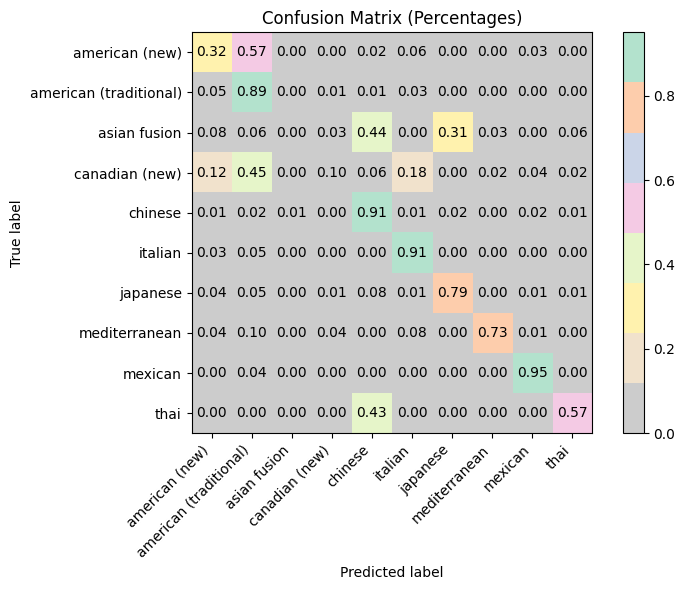

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val_2, preds_val_2, labels=clf_val_2.classes_)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # row-wise %

disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=clf_val_2.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Pastel2_r, values_format=".2f", ax=ax)

# Improve readability
for text in ax.texts:
    text.set_color("black")

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.title("Confusion Matrix (Percentages)")
plt.tight_layout()
plt.show()

#BERT Transformer Models

In [ ]:
# @title
fancy_header("Load Libraries")

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from transformers import (
    BertTokenizerFast,
    BertForSequenceClassification,
    Trainer,
    TrainingArguments
)
from datasets import Dataset
import torch
import random
import os

In [ ]:
# @title
fancy_header("Set Seed")

Set seed for reproducibility, but NOTE IT IS NOT 100% reproducible, as there is still some level of randomness in Hugging Face Transformer models:

In [ ]:
def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # when using GPU
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)

set_seed(42)

In [ ]:
# @title
fancy_header("Encode Labels")

Encode labels as numbers (e.g., "Italian" -> class "1"):

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_train["label"].values)
num_classes = len(label_encoder.classes_)

In [ ]:
print(df_train["label"].values)
print(y)

['american (traditional)' 'american (new)' 'mexican' ... 'mexican'
 'japanese' 'chinese']
[1 0 8 ... 8 6 4]


##Model 3

In [ ]:
# @title
fancy_header("Model 3")

In [ ]:
# @title
fancy_header("Split Data")

Split labeled training data into training (80%), validation (10%) and test (10%) sets. This is a common split for NLP and a dataset of this size (13k rows). It also performed better than 70%/15%/15%

In [ ]:
X_3=df_train["text"].values
y_3=y

# Train (80%), Temp (20%) split
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(
    X_3,
    y_3,
    test_size=0.2,
    random_state=42,
    stratify=y_3
)

# Temp → Validation (10%), Test (10%) split
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(
    X_temp_3,
    y_temp_3,
    test_size=0.5,
    random_state=42,
    stratify=y_temp_3
)

# Delete temp vars and print shapes with % of total
del X_temp_3, y_temp_3
total_samples_3 = len(df_train)

print(f"the shape of the training set (input) is: {X_train_3.shape} ({len(X_train_3)/total_samples_3:.1%} of total)")
print(f"the shape of the training set (target) is: {y_train_3.shape} ({len(y_train_3)/total_samples_3:.1%} of total)\n")

print(f"the shape of the cross validation set (input) is: {X_val_3.shape} ({len(X_val_3)/total_samples_3:.1%} of total)")
print(f"the shape of the cross validation set (target) is: {y_val_3.shape} ({len(y_val_3)/total_samples_3:.1%} of total)\n")

print(f"the shape of the test set (input) is: {X_test_3.shape} ({len(X_test_3)/total_samples_3:.1%} of total)")
print(f"the shape of the test set (target) is: {y_test_3.shape} ({len(y_test_3)/total_samples_3:.1%} of total)")


the shape of the training set (input) is: (10515,) (80.0% of total)
the shape of the training set (target) is: (10515,) (80.0% of total)

the shape of the cross validation set (input) is: (1314,) (10.0% of total)
the shape of the cross validation set (target) is: (1314,) (10.0% of total)

the shape of the test set (input) is: (1315,) (10.0% of total)
the shape of the test set (target) is: (1315,) (10.0% of total)


In [ ]:
# @title
fancy_header("Tokenize data")

Tokenize the text using Bert Tokenizer. Caps each observation at 512 tokens:

*(I tested out different levels but this is the max the model can use and performed the best when it captured as much of the review as possible)*

In [ ]:
bert_tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

def tokenize_texts_with_bert(texts, max_length=512):
  #truncates at 512 tokens per row
    return bert_tokenizer(
        list(texts),
        max_length=max_length,
        padding='max_length',
        truncation=True
    )

train_encodings_3 = tokenize_texts_with_bert(X_train_3)
val_encodings_3 = tokenize_texts_with_bert(X_val_3)
test_encodings_3 = tokenize_texts_with_bert(X_test_3)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# @title
fancy_header("Create dataset objects")

Creates Hugging Face dataset objects from a Python dictionary of an id, tokenized texts and their labels, to use in training.

In [ ]:
train_dataset_3 = Dataset.from_dict({
    'input_ids': train_encodings_3['input_ids'],
    'attention_mask': train_encodings_3['attention_mask'],
    'labels': list(y_train_3)
})

val_dataset_3 = Dataset.from_dict({
    'input_ids': val_encodings_3['input_ids'],
    'attention_mask': val_encodings_3['attention_mask'],
    'labels': list(y_val_3)
})

test_dataset_3 = Dataset.from_dict({
    'input_ids': test_encodings_3['input_ids'],
    'attention_mask': test_encodings_3['attention_mask'],
    'labels': list(y_test_3)
})


In [ ]:
# @title
fancy_header("Train model")

Call BERT model for classification:

In [ ]:
model_3 = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=num_classes,
)
#default dropout is 0.1

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Train the BERT model with the following arguments:

In [ ]:
training_args_bert = TrainingArguments(
    output_dir='./results',
    num_train_epochs=4, #3-5 recommended, lower prevents overfitting
    learning_rate=2e-5, #want lower if data is noisy/smaller
    per_device_train_batch_size=16, #lower (8,16) uses less memory
    per_device_eval_batch_size=16,
    warmup_steps=100,
    #gradually increases learning rate at start of training to prevent destabilizing of gradient descent
    weight_decay=0.009, #regularizes to prevent overfitting
    logging_dir='./logs',
    eval_strategy='epoch', #epochs vs. early stopping
    save_strategy='epoch',
    load_best_model_at_end=True,
    report_to="none",  # disables W&B logging
    run_name='bert-review-classifier',
    seed=42
)

Build function to calculate accuracy:

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return {
        "accuracy": accuracy_score(labels, predictions)
    }

Train the model:

In [ ]:
bert_trainer_3 = Trainer(
    model=model_3,
    args=training_args_bert,
    train_dataset=train_dataset_3,
    eval_dataset=val_dataset_3,  # val set used during training
    compute_metrics=compute_metrics
)

bert_trainer_3.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,1.111800,0.663517,0.770167
2,0.562600,0.580290,0.793760
3,0.499000,0.610249,0.787671
4,0.336800,0.634222,0.793760


TrainOutput(global_step=2632, training_loss=0.5729845693408537, metrics={'train_runtime': 870.7844, 'train_samples_per_second': 48.301, 'train_steps_per_second': 3.023, 'total_flos': 1.106724587802624e+16, 'train_loss': 0.5729845693408537, 'epoch': 4.0})

In [ ]:
# @title
fancy_header("Model Accuracy: Validation Set")

Evaluate the accuracy of the predictions:

In [ ]:
val_results_3 = bert_trainer_3.evaluate(val_dataset_3)
print(f"\n Validation Accuracy: {val_results_3['eval_accuracy']:.4f}")


 Validation Accuracy: 0.7938


In [ ]:
# @title
fancy_header("Classification Report: Validation Set")

View accuracy by class (restaurant type) and accuracy type (precision vs. recall vs. F1):

Improvements were optimized to the F1 score during modeling:

In [ ]:
val_predictions_3 = bert_trainer_3.predict(val_dataset_3)
y_val_pred_3 = np.argmax(val_predictions_3.predictions, axis=1)
y_val_true_3 = val_predictions_3.label_ids

val_report_3 = classification_report(y_val_true_3, y_val_pred_3, target_names=label_encoder.classes_)
print("\n Validation Classification Report:\n", val_report_3)


 Validation Classification Report:
                         precision    recall  f1-score   support

        american (new)       0.52      0.42      0.47       140
american (traditional)       0.68      0.75      0.71       268
          asian fusion       0.36      0.36      0.36        36
        canadian (new)       0.37      0.35      0.36        49
               chinese       0.91      0.89      0.90       169
               italian       0.89      0.95      0.92       203
              japanese       0.89      0.92      0.90       106
         mediterranean       0.94      0.79      0.86        73
               mexican       0.96      0.97      0.96       221
                  thai       0.83      0.82      0.82        49

              accuracy                           0.79      1314
             macro avg       0.74      0.72      0.73      1314
          weighted avg       0.79      0.79      0.79      1314



In [ ]:
# @title
fancy_header("Confusion Matrix")

Run confusion matrix to see where exactly predictions are going wrong:

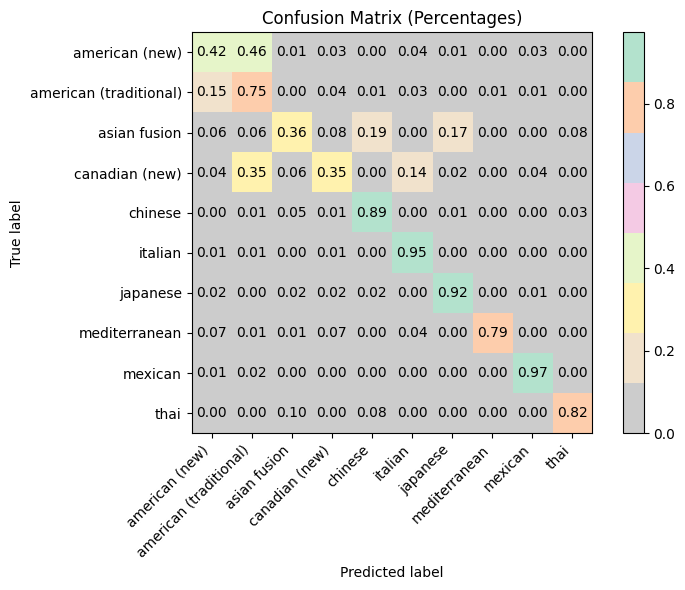

In [ ]:
# This gives the original labels in the correct encoded order
label_names = label_encoder.classes_

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix and percentages
cm = confusion_matrix(y_val_true_3, y_val_pred_3, labels=range(len(label_names)))
cm_percent = cm.astype(float) / cm.sum(axis=1, keepdims=True)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=label_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Pastel2_r, values_format=".2f", ax=ax)

# Improve readability
for text in ax.texts:
    text.set_color("black")

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.title("Confusion Matrix (Percentages)")
plt.tight_layout()
plt.show()

##Model 4

In [ ]:
# @title
fancy_header("Model 4")

In [ ]:
# @title
fancy_header("Split Data")

Perform same steps as Model 3:

Split data into 80/10/10 Train, Validation, Test split:

In [ ]:
X_4=df_train["text_review_and_features"].values
y_4=y

# Train (80%), Temp (20%) split
X_train_4, X_temp_4, y_train_4, y_temp_4 = train_test_split(
    X_4,
    y_4,
    test_size=0.2,
    random_state=42,
    stratify=y_4
)

# Temp → Validation (10%), Test (10%) split
X_val_4, X_test_4, y_val_4, y_test_4 = train_test_split(
    X_temp_4,
    y_temp_4,
    test_size=0.5,
    random_state=42,
    stratify=y_temp_4
)

# Delete temp vars and print shapes with % of total
del X_temp_4, y_temp_4
total_samples_4 = len(df_train)

print(f"the shape of the training set (input) is: {X_train_4.shape} ({len(X_train_4)/total_samples_4:.1%} of total)")
print(f"the shape of the training set (target) is: {y_train_4.shape} ({len(y_train_4)/total_samples_4:.1%} of total)\n")

print(f"the shape of the cross validation set (input) is: {X_val_4.shape} ({len(X_val_4)/total_samples_4:.1%} of total)")
print(f"the shape of the cross validation set (target) is: {y_val_4.shape} ({len(y_val_4)/total_samples_4:.1%} of total)\n")

print(f"the shape of the test set (input) is: {X_test_4.shape} ({len(X_test_4)/total_samples_4:.1%} of total)")
print(f"the shape of the test set (target) is: {y_test_4.shape} ({len(y_test_4)/total_samples_4:.1%} of total)")


the shape of the training set (input) is: (10515,) (80.0% of total)
the shape of the training set (target) is: (10515,) (80.0% of total)

the shape of the cross validation set (input) is: (1314,) (10.0% of total)
the shape of the cross validation set (target) is: (1314,) (10.0% of total)

the shape of the test set (input) is: (1315,) (10.0% of total)
the shape of the test set (target) is: (1315,) (10.0% of total)


In [ ]:
train_encodings_4 = tokenize_texts_with_bert(X_train_4)
val_encodings_4 = tokenize_texts_with_bert(X_val_4)
test_encodings_4 = tokenize_texts_with_bert(X_test_4)

In [ ]:
# @title
fancy_header("Train Model")

Create Hugging Face Datasets for Train, Val, Test:

In [ ]:
train_dataset_4 = Dataset.from_dict({
    'input_ids': train_encodings_4['input_ids'],
    'attention_mask': train_encodings_4['attention_mask'],
    'labels': list(y_train_4)
})

val_dataset_4 = Dataset.from_dict({
    'input_ids': val_encodings_4['input_ids'],
    'attention_mask': val_encodings_4['attention_mask'],
    'labels': list(y_val_4)
})

test_dataset_4 = Dataset.from_dict({
    'input_ids': test_encodings_4['input_ids'],
    'attention_mask': test_encodings_4['attention_mask'],
    'labels': list(y_test_4)
})

Call pre-trained BERT model:

In [ ]:
model_4 = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=num_classes,
)
#default dropout is 0.1

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Train model:

In [ ]:
bert_trainer_4 = Trainer(
    model=model_4,
    args=training_args_bert, #used same training args as model 3
    train_dataset=train_dataset_4,
    eval_dataset=val_dataset_4,  # val set used during training
    compute_metrics=compute_metrics
)

bert_trainer_4.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,1.037400,0.573135,0.789193
2,0.502300,0.509515,0.819635
3,0.436800,0.527221,0.815830
4,0.282900,0.555228,0.821157


TrainOutput(global_step=2632, training_loss=0.5111984974707514, metrics={'train_runtime': 871.1586, 'train_samples_per_second': 48.281, 'train_steps_per_second': 3.021, 'total_flos': 1.106724587802624e+16, 'train_loss': 0.5111984974707514, 'epoch': 4.0})

In [ ]:
# @title
fancy_header("Model Accuracy: Validation Set")

Evaluate accuracy:

In [ ]:
val_results_4 = bert_trainer_4.evaluate(val_dataset_4)
print(f"\n Validation Accuracy: {val_results_4['eval_accuracy']:.4f}")


 Validation Accuracy: 0.8196


Run classification report to view accuracy by Restaurant Type (class):

In [ ]:
val_predictions_4 = bert_trainer_4.predict(val_dataset_4)
y_val_pred_4 = np.argmax(val_predictions_4.predictions, axis=1)
y_val_true_4 = val_predictions_4.label_ids

val_report_4 = classification_report(y_val_true_4, y_val_pred_4, target_names=label_encoder.classes_)
print("\n Validation Classification Report:\n", val_report_4)


 Validation Classification Report:
                         precision    recall  f1-score   support

        american (new)       0.59      0.59      0.59       140
american (traditional)       0.79      0.70      0.74       268
          asian fusion       0.47      0.42      0.44        36
        canadian (new)       0.41      0.67      0.51        49
               chinese       0.91      0.93      0.92       169
               italian       0.90      0.93      0.91       203
              japanese       0.89      0.96      0.93       106
         mediterranean       0.92      0.78      0.84        73
               mexican       0.97      0.97      0.97       221
                  thai       0.98      0.84      0.90        49

              accuracy                           0.82      1314
             macro avg       0.78      0.78      0.77      1314
          weighted avg       0.83      0.82      0.82      1314



In [ ]:
# @title
fancy_header("Confusion Matrix")

Run Confusion Matrix to see where predictions are going wrong:

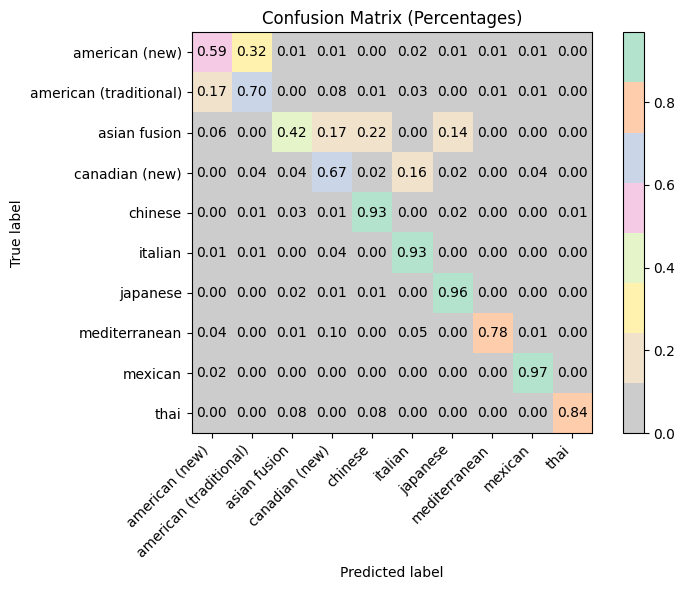

In [ ]:
# This gives the original labels in the correct encoded order
label_names = label_encoder.classes_

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix and percentages
cm = confusion_matrix(y_val_true_4, y_val_pred_4, labels=range(len(label_names)))
cm_percent = cm.astype(float) / cm.sum(axis=1, keepdims=True)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=label_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Pastel2_r, values_format=".2f", ax=ax)

# Improve readability
for text in ax.texts:
    text.set_color("black")

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.title("Confusion Matrix (Percentages)")
plt.tight_layout()
plt.show()


#RoBERTa Transformer Model

##Model 5

In [ ]:
# @title
fancy_header("Model 5")

Use a different transformer model (Roberta) and run it on the Review + Other Features data as Model 5:

Differences between RoBERTa and BERT:


*   RoBERTa is trained on more data with longer training and bigger batches
*   It removes Next Sentence Prediction, focusing only on masked language modeling
*  Uses dynamic masking (changing masked tokens during training) instead of static masking
*  Has improved hyperparameters and training setup for better performance
* Overall, RoBERTa achieves higher accuracy and is more robust than BERT

In [ ]:
# @title
fancy_header("Load Libraries")

Load libraries for RoBERTa model:

In [ ]:
from transformers import (
    RobertaTokenizerFast,
    RobertaForSequenceClassification,
    Trainer,
    TrainingArguments
)

In [ ]:
# @title
fancy_header("Split Data")

Split data into 80/10/10 Train, Validation, Test:

In [ ]:
X_5=df_train["text_review_and_features"].values
y_5=y

# Train (80%), Temp (20%) split
X_train_5, X_temp_5, y_train_5, y_temp_5 = train_test_split(
    X_5,
    y_5,
    test_size=0.2,
    random_state=42,
    stratify=y_5
)

# Temp → Validation (10%), Test (10%) split
X_val_5, X_test_5, y_val_5, y_test_5 = train_test_split(
    X_temp_5,
    y_temp_5,
    test_size=0.5,
    random_state=42,
    stratify=y_temp_5
)

# Delete temp vars and print shapes with % of total
del X_temp_5, y_temp_5
total_samples_5 = len(df_train)

print(f"the shape of the training set (input) is: {X_train_5.shape} ({len(X_train_5)/total_samples_5:.1%} of total)")
print(f"the shape of the training set (target) is: {y_train_5.shape} ({len(y_train_5)/total_samples_5:.1%} of total)\n")

print(f"the shape of the cross validation set (input) is: {X_val_5.shape} ({len(X_val_5)/total_samples_5:.1%} of total)")
print(f"the shape of the cross validation set (target) is: {y_val_5.shape} ({len(y_val_5)/total_samples_5:.1%} of total)\n")

print(f"the shape of the test set (input) is: {X_test_5.shape} ({len(X_test_5)/total_samples_5:.1%} of total)")
print(f"the shape of the test set (target) is: {y_test_5.shape} ({len(y_test_5)/total_samples_5:.1%} of total)")


the shape of the training set (input) is: (10515,) (80.0% of total)
the shape of the training set (target) is: (10515,) (80.0% of total)

the shape of the cross validation set (input) is: (1314,) (10.0% of total)
the shape of the cross validation set (target) is: (1314,) (10.0% of total)

the shape of the test set (input) is: (1315,) (10.0% of total)
the shape of the test set (target) is: (1315,) (10.0% of total)


Tokenize data with pre-trained Roberta model:

In [ ]:
roberta_tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base')

def tokenize_texts_with_roberta(texts, max_length=512):
  #truncates at 512 tokens per row
    return roberta_tokenizer(
        list(texts),
        max_length=max_length,
        padding='max_length',
        truncation=True
    )

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
train_encodings_5 = tokenize_texts_with_roberta(X_train_5)
val_encodings_5 = tokenize_texts_with_roberta(X_val_5)
test_encodings_5 = tokenize_texts_with_roberta(X_test_5)

In [ ]:
# @title
fancy_header("Train Model")

Create Hugging Face datasets for Train, Val, Test:

In [ ]:
train_dataset_5 = Dataset.from_dict({
    'input_ids': train_encodings_5['input_ids'],
    'attention_mask': train_encodings_5['attention_mask'],
    'labels': list(y_train_5)
})

val_dataset_5 = Dataset.from_dict({
    'input_ids': val_encodings_5['input_ids'],
    'attention_mask': val_encodings_5['attention_mask'],
    'labels': list(y_val_5)
})

test_dataset_5 = Dataset.from_dict({
    'input_ids': test_encodings_5['input_ids'],
    'attention_mask': test_encodings_5['attention_mask'],
    'labels': list(y_test_5)
})

Call RoBERTA model, this one includes dropout regularization of 0.1
Dropout randomly sets a percentage of the layer’s outputs to 0 in training
to force the model not to rely too much on any one neuron

In [ ]:
# Load model with dropout regularization (default dropout for RoBERTa is 0.1)
model_5 = RobertaForSequenceClassification.from_pretrained(
    'roberta-base',
    num_labels=num_classes,
)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Set training arguments:

In [ ]:
#Training arguments
training_args_roberta = TrainingArguments(
    output_dir='./results',
    num_train_epochs=4, #lower prevents overfitting
    learning_rate=2e-5, #want lower if data is noisy/smaller
    per_device_train_batch_size=16, #lower (8,16) uses less memory
    per_device_eval_batch_size=16,
    warmup_steps=100,
    #gradually increases learning rate at start of training to prevent destabilizing of gradient descent
    weight_decay=0.009, #regularizes to prevent overfitting
    logging_dir='./logs',
    eval_strategy='epoch', #epochs vs. early stopping
    save_strategy='epoch',
    load_best_model_at_end=True,
    report_to="none",  # disables W&B logging
    run_name='roberta-review-classifier'
)

Train the model:

In [ ]:
roberta_trainer_5 = Trainer(
    model=model_5,
    args=training_args_roberta,
    train_dataset=train_dataset_5,
    eval_dataset=val_dataset_5,  # val set used during training
    compute_metrics=compute_metrics
)

roberta_trainer_5.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.965800,0.606454,0.790715
2,0.501100,0.498290,0.821918
3,0.450500,0.511980,0.819635
4,0.311500,0.540946,0.827245


TrainOutput(global_step=2632, training_loss=0.5100406716297463, metrics={'train_runtime': 876.2356, 'train_samples_per_second': 48.001, 'train_steps_per_second': 3.004, 'total_flos': 1.106724587802624e+16, 'train_loss': 0.5100406716297463, 'epoch': 4.0})

In [ ]:
# @title
fancy_header("Model Accuracy: Validation Set")

Evaluate accuracy of predictions:

In [ ]:
val_results_5 = roberta_trainer_5.evaluate(val_dataset_5)
print(f"\n Validation Accuracy: {val_results_5['eval_accuracy']:.4f}")


 Validation Accuracy: 0.8219


Run classification report to show accuracy on Restaurant Type (class) level:

In [ ]:
val_predictions_5 = roberta_trainer_5.predict(val_dataset_5)
y_val_pred_5 = np.argmax(val_predictions_5.predictions, axis=1)
y_val_true_5 = val_predictions_5.label_ids

val_report_5 = classification_report(y_val_true_5, y_val_pred_5, target_names=label_encoder.classes_)
print("\n Validation Classification Report:\n", val_report_5)


 Validation Classification Report:
                         precision    recall  f1-score   support

        american (new)       0.58      0.56      0.57       140
american (traditional)       0.77      0.72      0.74       268
          asian fusion       0.50      0.42      0.45        36
        canadian (new)       0.41      0.69      0.52        49
               chinese       0.91      0.93      0.92       169
               italian       0.93      0.92      0.92       203
              japanese       0.93      0.98      0.95       106
         mediterranean       0.91      0.79      0.85        73
               mexican       0.97      0.97      0.97       221
                  thai       0.91      0.82      0.86        49

              accuracy                           0.82      1314
             macro avg       0.78      0.78      0.78      1314
          weighted avg       0.83      0.82      0.82      1314



Run confusion matrix to see where predictions are going wrong:

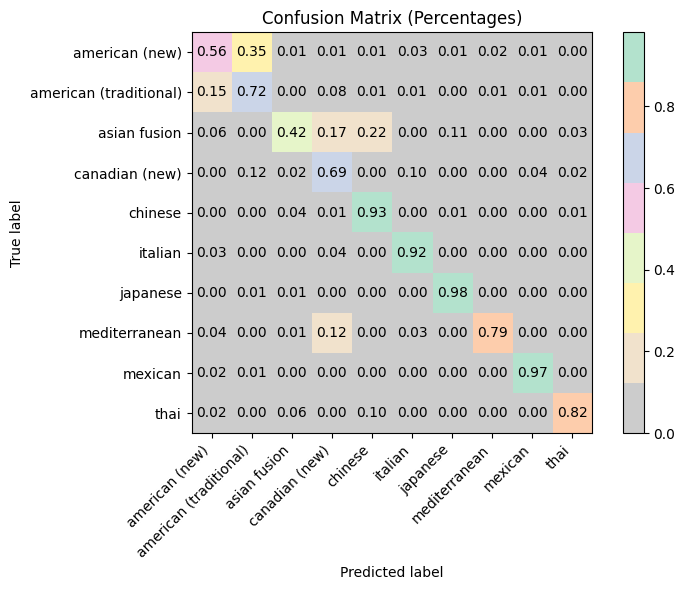

In [ ]:
# # This gives the original labels in the correct encoded order
# label_names = label_encoder.classes_

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix and percentages
cm = confusion_matrix(y_val_true_5, y_val_pred_5, labels=range(len(label_names)))
cm_percent = cm.astype(float) / cm.sum(axis=1, keepdims=True)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=label_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Pastel2_r, values_format=".2f", ax=ax)

# Improve readability
for text in ax.texts:
    text.set_color("black")

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.title("Confusion Matrix (Percentages)")
plt.tight_layout()
plt.show()

#Model Comparison

In [ ]:
# @title
fancy_header("Model Comparison")

Model 1 Test Accuracy:

In [ ]:
clf_test_1 = LogisticRegression(max_iter=1000).fit(train_vec_1, df_train_1["label"])

preds_test_1 = clf_test_1.predict(X_test_1)

test_accuracy_1 = accuracy_score(y_test_1, preds_test_1)
print(f"Model 1 Test Accuracy: {test_accuracy_1:.4f}")

Model 1 Test Accuracy: 0.7795


In [ ]:
classification_report_test_1=classification_report(y_test_1, preds_test_1, zero_division=0)
print(classification_report_test_1)

                        precision    recall  f1-score   support

        american (new)       0.55      0.31      0.40       140
american (traditional)       0.63      0.86      0.73       268
          asian fusion       1.00      0.03      0.05        36
        canadian (new)       0.22      0.04      0.07        48
               chinese       0.79      0.94      0.85       170
               italian       0.84      0.95      0.89       203
              japanese       0.86      0.84      0.85       107
         mediterranean       0.84      0.79      0.82        73
               mexican       0.97      0.94      0.95       222
                  thai       0.98      0.83      0.90        48

              accuracy                           0.78      1315
             macro avg       0.77      0.65      0.65      1315
          weighted avg       0.77      0.78      0.75      1315



Model 2 Test Accuracy:

In [ ]:
clf_test_2 = LogisticRegression(max_iter=1000).fit(train_vec_2, df_train_2["label"])

preds_test_2 = clf_test_2.predict(X_test_2)

test_accuracy_2 = accuracy_score(y_test_2, preds_test_2)
print(f"Model 2 Test Accuracy: {test_accuracy_2:.4f}")

Model 2 Test Accuracy: 0.7787


In [ ]:
classification_report_test_2 = classification_report(y_test_2, preds_test_2)
print(classification_report_test_2)

                        precision    recall  f1-score   support

        american (new)       0.56      0.36      0.44       140
american (traditional)       0.64      0.85      0.73       268
          asian fusion       0.00      0.00      0.00        36
        canadian (new)       0.33      0.06      0.11        48
               chinese       0.76      0.94      0.84       170
               italian       0.84      0.93      0.88       203
              japanese       0.86      0.84      0.85       107
         mediterranean       0.85      0.79      0.82        73
               mexican       0.97      0.94      0.95       222
                  thai       0.97      0.81      0.89        48

              accuracy                           0.78      1315
             macro avg       0.68      0.65      0.65      1315
          weighted avg       0.75      0.78      0.75      1315



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model 3 Test Accuracy:

In [ ]:
test_predictions_3 = bert_trainer_3.predict(test_dataset_3)
y_test_pred_3 = np.argmax(test_predictions_3.predictions, axis=1)
y_test_true_3 = test_predictions_3.label_ids

test_accuracy_3 = bert_trainer_3.evaluate(test_dataset_3)
print(f"\n Model 3 Test Accuracy: {test_accuracy_3['eval_accuracy']:.4f}")
test_accuracy_3 = test_accuracy_3['eval_accuracy']


 Model 3 Test Accuracy: 0.8038


In [ ]:
classification_report_test_3 = classification_report(y_test_true_3, y_test_pred_3, target_names=label_encoder.classes_)
print("\n Model 3 Test Classification Report:\n", classification_report_test_3)


 Model 3 Test Classification Report:
                         precision    recall  f1-score   support

        american (new)       0.50      0.49      0.49       140
american (traditional)       0.69      0.71      0.70       268
          asian fusion       0.49      0.53      0.51        36
        canadian (new)       0.46      0.35      0.40        48
               chinese       0.95      0.92      0.93       170
               italian       0.88      0.95      0.91       203
              japanese       0.91      0.92      0.91       107
         mediterranean       0.86      0.85      0.86        73
               mexican       0.97      0.95      0.96       222
                  thai       0.98      0.92      0.95        48

              accuracy                           0.80      1315
             macro avg       0.77      0.76      0.76      1315
          weighted avg       0.80      0.80      0.80      1315



Model 4 Test Accuracy:

In [ ]:
test_predictions_4 = bert_trainer_4.predict(test_dataset_4)
y_test_pred_4 = np.argmax(test_predictions_4.predictions, axis=1)
y_test_true_4 = test_predictions_4.label_ids

test_accuracy_4 = bert_trainer_4.evaluate(test_dataset_4)
print(f"\n Model 4 Test Accuracy: {test_accuracy_4['eval_accuracy']:.4f}")
test_accuracy_4 = test_accuracy_4['eval_accuracy']


 Model 4 Test Accuracy: 0.8213


In [ ]:
classification_report_test_4 = classification_report(y_test_true_4, y_test_pred_4, target_names=label_encoder.classes_)
print("\n Model 4 Test Classification Report:\n", classification_report_test_4)


 Model 4 Test Classification Report:
                         precision    recall  f1-score   support

        american (new)       0.59      0.61      0.60       140
american (traditional)       0.76      0.68      0.72       268
          asian fusion       0.42      0.47      0.45        36
        canadian (new)       0.48      0.65      0.55        48
               chinese       0.92      0.92      0.92       170
               italian       0.90      0.96      0.93       203
              japanese       0.89      0.91      0.90       107
         mediterranean       0.93      0.86      0.89        73
               mexican       0.95      0.95      0.95       222
                  thai       1.00      0.90      0.95        48

              accuracy                           0.82      1315
             macro avg       0.78      0.79      0.79      1315
          weighted avg       0.83      0.82      0.82      1315



Model 5 Test Accuracy:

In [ ]:
test_predictions_5 = roberta_trainer_5.predict(test_dataset_5)
y_test_pred_5 = np.argmax(test_predictions_5.predictions, axis=1)
y_test_true_5 = test_predictions_5.label_ids

test_accuracy_5 = roberta_trainer_5.evaluate(test_dataset_5)
print(f"\n Model 5 Test Accuracy: {test_accuracy_5['eval_accuracy']:.4f}")
test_accuracy_5 = test_accuracy_5['eval_accuracy']


 Model 5 Test Accuracy: 0.8198


In [ ]:
classification_report_test_5 = classification_report(y_test_true_5, y_test_pred_5, target_names=label_encoder.classes_)
print("\n Model 5 Test Classification Report:\n", classification_report_test_5)


 Model 5 Test Classification Report:
                         precision    recall  f1-score   support

        american (new)       0.55      0.61      0.58       140
american (traditional)       0.75      0.68      0.71       268
          asian fusion       0.55      0.44      0.49        36
        canadian (new)       0.49      0.69      0.57        48
               chinese       0.93      0.93      0.93       170
               italian       0.91      0.93      0.92       203
              japanese       0.88      0.93      0.90       107
         mediterranean       0.87      0.84      0.85        73
               mexican       0.98      0.95      0.96       222
                  thai       0.96      0.92      0.94        48

              accuracy                           0.82      1315
             macro avg       0.79      0.79      0.79      1315
          weighted avg       0.83      0.82      0.82      1315



Comparison Chart for Accuracy:

In [ ]:
import pandas as pd

# Round and convert to percent strings
acc_1 = f"{round(test_accuracy_1 * 100, 1)}%"
acc_2 = f"{round(test_accuracy_2 * 100, 1)}%"
acc_3 = f"{round(test_accuracy_3 * 100, 1)}%"
acc_4 = f"{round(test_accuracy_4 * 100, 1)}%"
acc_5 = f"{round(test_accuracy_5 * 100, 1)}%"


# Create the DataFrame
accuracy_df = pd.DataFrame({
    'Model #': ['1', '2','3','4','5'],
    'Model': ['Logistic Regression', 'Logistic Regression','BERT','BERT','RoBERTa'],
    'Model Description': ['Avg. Word2Vec Embeddings', 'Avg. Word2Vec Embeddings','Transformer','Transformer','Transformer'],
    'Accuracy': [acc_1, acc_2, acc_3, acc_4, acc_5],
    'Type': ['Baseline', 'Candidate', 'Candidate','Final','Candidate',]
})

accuracy_df


,Model #,Model,Model Description,Accuracy,Type
0,1,Logistic Regression,Avg. Word2Vec Embeddings,77.9%,Baseline
1,2,Logistic Regression,Avg. Word2Vec Embeddings,77.9%,Candidate
2,3,BERT,Transformer,80.4%,Candidate
3,4,BERT,Transformer,82.1%,Final
4,5,RoBERTa,Transformer,82.0%,Candidate


Comparison chart for classification report:

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate reports
report_1 = classification_report(y_test_1, preds_test_1, zero_division=0, output_dict=True)
report_2 = classification_report(y_test_2, preds_test_2, zero_division=0, output_dict=True)
report_3 = classification_report(y_test_true_3, y_test_pred_3, zero_division=0, output_dict=True, target_names=label_encoder.classes_)
report_4 = classification_report(y_test_true_4, y_test_pred_4, zero_division=0, output_dict=True, target_names=label_encoder.classes_)
report_5 = classification_report(y_test_true_5, y_test_pred_5, zero_division=0, output_dict=True, target_names=label_encoder.classes_)

# Convert to DataFrames
df1 = pd.DataFrame(report_1).T[['f1-score']].rename(columns={'f1-score': 'Model 1: Avg. Embeddings Review Only'})
df2 = pd.DataFrame(report_2).T[['f1-score']].rename(columns={'f1-score': 'Model 2: Avg. Embeddings Review+Features'})
df3 = pd.DataFrame(report_3).T[['f1-score']].rename(columns={'f1-score': 'Model 3: BERT Review Only'})
df4 = pd.DataFrame(report_4).T[['f1-score']].rename(columns={'f1-score': 'Model 4: BERT Review + Features'})
df5 = pd.DataFrame(report_5).T[['f1-score']].rename(columns={'f1-score': 'Model 5: RoBERTa Review + Features'})

# Combine
comparison_df = pd.concat([df1, df2, df3, df4, df5], axis=1)

# Separate summary rows and class rows
summary_rows = ['accuracy', 'macro avg', 'weighted avg']
summary_df = comparison_df.loc[summary_rows]
class_df = comparison_df.drop(index=summary_rows)

# Combine summary first, then classes
final_df = pd.concat([summary_df, class_df])


Formatted/Final Comparison Chart:

In [ ]:
import plotly.graph_objects as go

# Format as percentage where applicable
def format_percent(df):
    return df.copy().apply(lambda col: col.map(lambda x: f"{x*100:.1f}%" if isinstance(x, float) else x))

# Split summary and class rows
summary_rows = ['accuracy', 'macro avg', 'weighted avg']
summary_df = format_percent(comparison_df.loc[summary_rows].reset_index())
summary_df.columns = ['Metric'] + list(summary_df.columns[1:])

class_df = format_percent(comparison_df.drop(index=summary_rows, errors='ignore').reset_index())
class_df.columns = ['Class'] + list(class_df.columns[1:])

# Colors
body = '#fdfdfe'
header = '#d3b4e5'

def make_table(data, height):
    fig = go.Figure(data=[go.Table(
        header=dict(
            values=list(data.columns),
            fill_color=header,
            font=dict(color='black', size=12),
            align='center'
        ),
        cells=dict(
            values=[data[col] for col in data.columns],
            fill_color=body,
            font=dict(color='gray', size=12),
            align='center'
        )
    )])
    fig.update_layout(width=950, height=height, margin=dict(l=10, r=10, t=20, b=10))
    return fig

# Show both tables
make_table(summary_df, 300).show()
make_table(class_df, 300).show()


#Misc

In [ ]:
# @title
fancy_header("Freeze Library Requirements")

In [ ]:
# !pip freeze > full_requirements.txt

In [ ]:
# !pipreqs /content/ --force --savepath used_requirements.txt


INFO: Not scanning for jupyter notebooks.
INFO: Successfully saved requirements file in used_requirements.txt


In [ ]:
!jupyter nbconvert --to script 'Formatted - NLP Restaurant Prediction | Porfolio CV + Test.ipynb'


[NbConvertApp] WARNING | pattern 'Formatted - NLP Restaurant Prediction | Porfolio CV + Test.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent t